In [ ]:
!pip install -U scikit-fuzzy

import numpy as np
import pandas as pd
from six import StringIO
from sklearn import metrics

import skfuzzy as fuzz
import matplotlib as plt
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=6ca33a9acb05947704f3653a0b7d0f74645a1c2ae4a1a0a56ce5f86fb8fd5a5f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Mulai Dari Sini

In [ ]:
#dataset = 'Data Lahan Hortikultura 2023.xlsx'

In [ ]:
dataset = '/content/drive/MyDrive/TrainingPython/Data Lahan Hortikultura 202323.xlsx'

In [ ]:
data = pd.read_excel(dataset , sheet_name = 'Data_Kecocokan_Lahan', header = 0, skiprows = 4).drop([2],axis=1)
data[12].iloc[-1] = '8 - 14'
data[12].iloc[-1]

<ipython-input-5-e5bc9fab1971>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[12].iloc[-1] = '8 - 14'


'8 - 14'

In [ ]:
data.head()

,1,3,4,5,6,7,8,9,10,11,12,13
0,1.0,Kota Uneng,255,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,23-33,1173-2277,74-86,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
# data = pd.read_excel(dataset , sheet_name = 'Data Kesesuaian Lahan', header = 0, skiprows = 4).drop([1,2],axis=1)
data2 = pd.read_excel(dataset , sheet_name = 'Data_Profil_Ideal_Kecocokan_Lhn',header = 5)


In [ ]:
data.head()

,1,3,4,5,6,7,8,9,10,11,12,13
0,1.0,Kota Uneng,255,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,23-33,1173-2277,74-86,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
data2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,S1,S2,S3,N,S1.1,S2.1,S3.1,...,N.5,S1.6,S2.6,S3.6,N.6,S1.7,S2.7,S3.7,N.7,Unnamed: 35
0,1,Bawang Merah,2-3 bln,10-25,25-30,30-35,>35,350-600,600-800,800-1600,...,-,<8,8-16,16-30,>30,700-1000,NaN,NaN,NaN,NaN
1,2,Cabai Merah,2 mg,18-26,26-27,27-28,>28,600-1200,1200-1400,>1400,...,-,<8,8-16,16-30,>30,900-1800,NaN,NaN,NaN,NaN
2,3,Cabai Rawit,2 mg,18-26,26-27,27-28,>28,600-1200,1200-1400,>1400,...,-,<8,8-16,16-30,>30,900-1800,NaN,NaN,NaN,NaN
3,4,Tomat,2 mg,18-26,26-30,30-35,>35,400-700,700-800,>800,...,-,<8,8-16,16-30,>30,350-750,NaN,NaN,NaN,
4,5,Wortel,2-3 bln,16-18,18-20,20-23,>23,>80,65-80,50-65,...,-,<8,8-16,16-30,>30,1000-1200,NaN,NaN,NaN,NaN


## Buat Dalam List dulu kalimatnya

In [ ]:
def split_string(input_string):
    # Mengganti karakter newline dengan spasi
    cleaned_string = input_string.replace('\n', ' ')

    # Mengubah semua karakter menjadi huruf kecil
    cleaned_string = cleaned_string.lower()

    # Pisahkan string pertama dengan pemisah "dan"
    parts_with_and = cleaned_string.split(" dan ")

    # Buat list kosong untuk menyimpan hasil akhir
    result_list = []

    # Iterasi melalui setiap bagian yang telah dipisahkan dengan "dan"
    for part in parts_with_and:
        # Kemudian, pisahkan setiap bagian dengan pemisah "koma"
        subparts = part.split(",")
        # Hapus spasi di awal dan akhir setiap elemen
        subparts = [subpart.strip() for subpart in subparts]
        # Tambahkan setiap elemen dalam subparts ke dalam result_list
        result_list.extend(subparts)

    # Hasil akhir adalah list yang telah dipisahkan
    return result_list

# Contoh penggunaan fungsi
x = data[10].iloc[4]
result = split_string(x)
print(result)


['liat', 'liat berpasir', 'lempung berpasir', 'lempung bedebu']


In [ ]:
data.head()

,1,3,4,5,6,7,8,9,10,11,12,13
0,1.0,Kota Uneng,255,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,23-33,1173-2277,74-86,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
#Fungsi untuk ngecek keseusaian tekstur tanah
def tekstur_tanah_func(df,df2):
    #Deklarasi dulu nilai default scorenya
    score_bawangmerah = 1
    score_cabaimerah = 1

    #Deklarasi setiap list-nya
    tekstur_tanah_list_1 = split_string(df[10])
    print(tekstur_tanah_list_1) # Cuma utk ngecek (bisa dikomen aja)
    tekstur_tanah_list_bawangmerah = split_string(df2['S1.4'].iloc[0])
    print(tekstur_tanah_list_bawangmerah) # Cuma untuk ngecek (bisa dikomen aja)
    tekstur_tanah_list_cabaimerah = split_string(df2['S1.4'].iloc[1])
    print(tekstur_tanah_list_cabaimerah) # Cuma untuk ngecek (bisa dikomen aja)

    #Tahap Ngecek satu persatu-satu

    for tekstur1 in tekstur_tanah_list_1:

        #Ini jika ngecek bawang merah apakah sesuai?
        if tekstur1 in tekstur_tanah_list_bawangmerah:
            score_bawangmerah = 5

        #Ini jika ngecek cabai merah apakah sesuai?
        if tekstur1 in tekstur_tanah_list_cabaimerah:
            score_cabaimerah= 5
    return score_bawangmerah,score_cabaimerah

score_bawangmerah_tekstur_tanah, score_cabaimerah_tekstur_tanah = tekstur_tanah_func(data.iloc[4],data2)
print('Desa/Kelurahan = ', data.iloc[4][3])
print('score_bawangmerah_tekstur_tanah = ',score_bawangmerah_tekstur_tanah)
print('score_cabaimerah_tekstur_tanah = ',score_cabaimerah_tekstur_tanah)


['liat', 'liat berpasir', 'lempung berpasir', 'lempung bedebu']
['liat berpasir', 'liat', 'liat berdebu', 'lempung berliat', 'lempung liat berpasir', 'lempung liat berdebu', 'lempung berpasir sangat halus', 'lempung', 'lempung berdebu', 'debu']
['liat berpasir', 'liat', 'liat berdebu', 'lempung berliat', 'lempung liat berpasir', 'lempung liat berdebu', 'lempung berpasir sangat halus', 'lempung', 'lempung berdebu', 'debu']
Desa/Kelurahan =  Tilang
score_bawangmerah_tekstur_tanah =  5
score_cabaimerah_tekstur_tanah =  5


In [ ]:
#Fungsi untuk ngecek keseusaian jenis tanah
def jenis_tanah_func(df,df2):
    #Deklarasi dulu nilai default scorenya
    score_bawangmerah = 1
    score_cabaimerah = 1

    #Deklarasi setiap list-nya
    jenis_tanah_list_1 = split_string(df[9])
    print(jenis_tanah_list_1) # Cuma utk ngecek (bisa dikomen aja)
    jenis_tanah_list_bawangmerah = split_string(df2['S1.3'].iloc[0])
    print(jenis_tanah_list_bawangmerah) # Cuma untuk ngecek (bisa dikomen aja)
    jenis_tanah_list_cabaimerah = split_string(df2['S1.3'].iloc[1])
    print(jenis_tanah_list_cabaimerah) # Cuma untuk ngecek (bisa dikomen aja)

    #Tahap Ngecek satu persatu-satu

    for jenis1 in jenis_tanah_list_1:

        #Ini jika ngecek bawang merah apakah sesuai?
        if jenis1 in jenis_tanah_list_bawangmerah:
            score_bawangmerah = 5

        #Ini jika ngecek cabai merah apakah sesuai?
        if jenis1 in jenis_tanah_list_cabaimerah:
            score_cabaimerah= 5
    return score_bawangmerah,score_cabaimerah

score_bawangmerah_jenis_tanah, score_cabaimerah_jenis_tanah = jenis_tanah_func(data.iloc[4],data2)
print('Desa/Kelurahan = ', data.iloc[4][3])
print('score_bawangmerah_jenis_tanah = ',score_bawangmerah_jenis_tanah)
print('score_cabaimerah_jenis_tanah = ',score_cabaimerah_jenis_tanah)


['regosol', 'latosol', 'grumosol']
['alluvial', 'glei humus', 'latosol']
['alluvial', 'glei humus', 'latosol']
Desa/Kelurahan =  Tilang
score_bawangmerah_jenis_tanah =  5
score_cabaimerah_jenis_tanah =  5


## Berhenti Di sini

In [ ]:
data.head()

,1,3,4,5,6,7,8,9,10,11,12,13
0,1.0,Kota Uneng,255,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,23-33,1173-2277,74-86,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
# Ganti nama kolom
data.columns = ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L']


In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,14-33,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,14-33,622-1425,45-80,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,23-33,1173-2277,74-86,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
# Fungsi untuk mengganti rentang suhu dengan nilai tengahnya
def replace_temperature_range(temperature):
    # Split rentang suhu menjadi dua nilai
    min_temp, max_temp = map(int, temperature.split('-'))
    # Hitung nilai tengah
    middle_temp = (min_temp + max_temp) / 2
    return middle_temp

# Terapkan fungsi penggantian pada kolom "Suhu (°C)"
data["E"] = data["E"].apply(replace_temperature_range)


In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,622-1425,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,23.5,622-1425,45-80,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,622-1425,45-80,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1173-2277,74-86,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
# Pemrosesan kolom F
def replace_rainfall_range(rainfall):
    # Split rentang curah hujan menjadi dua nilai
    min_rainfall, max_rainfall = map(int, rainfall.split('-'))
    # Hitung nilai tengah
    middle_rainfall = (min_rainfall + max_rainfall) / 2
    return middle_rainfall

# Terapkan fungsi penggantian pada kolom "Curah Hujan (mm/thn)"
data["F"] = data["F"].apply(replace_rainfall_range)


In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,45-80,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,45-80,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,45-80,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,74-86,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
# Pemrosesan kolom G
def replace_rainfall_range(rainfall):
    # Split rentang curah hujan menjadi dua nilai
    min_rainfall, max_rainfall = map(int, rainfall.split('-'))
    # Hitung nilai tengah
    middle_rainfall = (min_rainfall + max_rainfall) / 2
    return middle_rainfall

# Terapkan fungsi penggantian pada kolom "Curah Hujan (mm/thn)"
data["G"] = data["G"].apply(replace_rainfall_range)

In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,mediteran,"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,mediteran,"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,mediteran,"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"regosol, latosol, grumosol","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
# Terapkan fungsi konversi pada kolom "H" (Jenis Tanah) dan simpan hasilnya di kolom "H" juga
data['H'] = data['H'].apply(split_string)


In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,[mediteran],"lempung berpasir, bedebu","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,[mediteran],"lempung berpasir, bedebu","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,[mediteran],"liat berpasir ,lempung bedebu","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,[mediteran],"liat berpasir, lempung bedebu","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","liat, Liat berpasir,Lempung berpasir dan lempu...","4,2- 6",15-39,0-1000


In [ ]:
data['I'] = data['I'].apply(split_string)


In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]","6 - 7,5",0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]","6 - 7,5",0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]","4,2- 6",26-45,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]","4,2- 6",26-45,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...","4,2- 6",15-39,0-1000


In [ ]:
# Pemrosesan kolom J
def replace_ph_range(ph):
    ph = ph.replace(',','.')
    # Split rentang curah hujan menjadi dua nilai
    min_ph, max_ph = map(float, ph.split('-'))
    # Hitung nilai tengah
    middle_ph = (min_ph + max_ph) / 2
    return middle_ph

# Terapkan fungsi penggantian pada kolom "Curah Hujan (mm/thn)"
data["J"] = data["J"].apply(replace_ph_range)

In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,0 - < 4,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,0 - < 4,25-75
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,26-45,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,26-45,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,15-39,0-1000


In [ ]:
# Pemrosesan kolom K
def replace_kemiringan_range(kemiringan):
    if kemiringan == '> 61':
        kemiringan = '61 - 100'
    if kemiringan == 60:
        return kemiringan
    kemiringan = kemiringan.replace('<','').replace('>','')
    # Split rentang curah hujan menjadi dua nilai
    min_kemiringan, max_kemiringan = map(int, kemiringan.split('-'))
    # Hitung nilai tengah
    middle_kemiringan = (min_kemiringan + max_kemiringan) / 2
    return middle_kemiringan

# Terapkan fungsi penggantian pada kolom "Curah Hujan (mm/thn)"
data["K"] = data["K"].apply(replace_kemiringan_range)

In [ ]:
data

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,25-75
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,27.0,0-1000
5,NaN,Lusitada,770,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,27.0,0-1000
6,NaN,Bloro,763,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,27.0,0-1000
7,NaN,Tebuk,628,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,11.0,0-1000
8,NaN,Nita,196,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,11.0,0-1000
9,NaN,Takaplager,410,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,27.0,0-1000


In [ ]:
# # Preprocess Kolom K
# def preprocess_kemiringan(value):
#     # Mengecek jika nilai mengandung tanda '>'
#     if isinstance(value, str) and '>' in value:
#         # Menghapus tanda '>' dan spasi, kemudian konversi ke integer
#         return int(value.replace('>', '').strip())

#     # Mengecek jika nilai mengandung tanda '-'
#     elif isinstance(value, str) and '-' in value:
#         min_val, max_val = map(int, value.split('-'))
#         return (min_val + max_val) / 2

#     # Mengecek jika nilai tidak mengandung tanda '-' atau '>'
#     elif isinstance(value, (int, float)):
#         return float(value)

#     # Mengembalikan nilai asli jika tidak sesuai dengan kasus di atas
#     return value

# # Menggunakan fungsi untuk mengolah kolom "Kemiringan Lahan (%)"
# data['K'] = data['K'].apply(preprocess_kemiringan)

In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,0-75
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,25-75
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,0-500
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,0-500
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,27.0,0-1000


In [ ]:
# Pemrosesan kolom L
def replace_Tinggi_range(Tinggi):
    Tinggi = Tinggi.replace(',','.')
    # Split rentang curah hujan menjadi dua nilai
    min_Tinggi, max_Tinggi = map(float, Tinggi.split('-'))
    # Hitung nilai tengah
    middle_Tinggi = (min_Tinggi + max_Tinggi) / 2
    return middle_Tinggi

# Terapkan fungsi penggantian pada kolom "Curah Hujan (mm/thn)"
data["L"] = data["L"].apply(replace_Tinggi_range)

In [ ]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,37.5
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,50.0
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,250.0
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,250.0
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,27.0,500.0


In [ ]:
new_data = data.copy()
new_data.columns = ['no','Desa/Kelurahan','luas_lahan','iklim','Suhu','Curah Hujan','kelembapan','jenis_tanah','tekstur_tanah',
                    'ph_tanah','kemiringan_lahan','tinggi_tempat']

new_data.head()

,no,Desa/Kelurahan,luas_lahan,iklim,Suhu,Curah Hujan,kelembapan,jenis_tanah,tekstur_tanah,ph_tanah,kemiringan_lahan,tinggi_tempat
0,1.0,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,37.5
1,NaN,Nangalimang,203,Subtropik,23.5,1023.5,62.5,[mediteran],"[lempung berpasir, bedebu]",6.75,2.0,50.0
2,2.0,Wuring,1650,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,250.0
3,NaN,Wolomarang,700,Subtropik,23.5,1023.5,62.5,[mediteran],"[liat berpasir, lempung bedebu]",5.10,35.5,250.0
4,3.0,Tilang,1545,Subtropik,28.0,1725.0,80.0,"[regosol, latosol, grumosol]","[liat, liat berpasir, lempung berpasir, lempun...",5.10,27.0,500.0


## bawang_merah

#### temperature

In [ ]:
def interpolasi_suhu_bawang(x):

  score = 0

  if x < 25 :
    score = (((5-1)/(25-0)) * (x-0))+1

  elif x >= 25 and x <= 32:
    score = 5

  elif x > 32 and x <= 57 :
    score = (((1-5)/(57-32)) * (x-32))+5

  else:
    score = 1

  return score


data_bawang = new_data[['Desa/Kelurahan','Suhu']]
data_bawang['profile_ideal_suhu'] = '25-32'
data_bawang['score_suhu'] = data_bawang['Suhu'].apply(interpolasi_suhu_bawang)


data_bawang.head()

<ipython-input-35-c25abe8280fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bawang['profile_ideal_suhu'] = '25-32'
<ipython-input-35-c25abe8280fa>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bawang['score_suhu'] = data_bawang['Suhu'].apply(interpolasi_suhu_bawang)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,25-32,4.76
1,Nangalimang,23.5,25-32,4.76
2,Wuring,23.5,25-32,4.76
3,Wolomarang,23.5,25-32,4.76
4,Tilang,28.0,25-32,5.00


#### curah hujan

In [ ]:
def interpolasi_curah_hujan_bawang(x):

  score = 0

  if x < 300 :
    score = (((5-1)/(300-0)) * (x-0))+1

  elif x >= 300 and x <= 2500:
    score = 5

  elif x > 2500 and x <= 2800 :
    score = (((1-5)/(2800-2500)) * (x-2500))+5

  else:
    score = 1

  return score


data_bawang['curah_hujan'] = new_data['Curah Hujan']
data_bawang['profile_ideal_curah_hujan'] = '300-2500'
data_bawang['score_curah_hujan'] = data_bawang['curah_hujan'].apply(interpolasi_curah_hujan_bawang)


data_bawang.head()

<ipython-input-36-3ee63f104dc7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bawang['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-36-3ee63f104dc7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bawang['profile_ideal_curah_hujan'] = '300-2500'
<ipython-input-36-3ee63f104dc7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5


#### kelembapan

In [ ]:
def interpolasi_kelembapan_bawang(x):

  score = 0

  if x < 80 :
    score = (((5-1)/(80-0)) * (x-0))+1

  elif x >= 80 and x <= 90:
    score = 5

  elif x > 90 and x <= 170 :
    score = (((1-5)/(170-90)) * (x-90))+5

  else:
    score = 1

  return score


data_bawang['kelembapan'] = new_data['kelembapan']
data_bawang['profile_ideal_kelembapan'] = '80-90'
data_bawang['score_kelembapan'] = data_bawang['kelembapan'].apply(interpolasi_kelembapan_bawang)


data_bawang.head()

<ipython-input-37-02590be404f2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bawang['kelembapan'] = new_data['kelembapan']
<ipython-input-37-02590be404f2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bawang['profile_ideal_kelembapan'] = '80-90'
<ipython-input-37-02590be404f2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_bawang(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Glei Humus, Latosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_bawang['jenis_tanah'] = new_data['jenis_tanah']
data_bawang['profile_ideal_jenis_tanah'] = 'Alluvial, Glei Humus, Latosol'
data_bawang['score_jenis_tanah'] = data_bawang['jenis_tanah'].apply(interpolasi_jenis_tanah_bawang)


data_bawang.head()

<ipython-input-38-700eac3be985>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bawang['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,"[regosol, latosol, grumosol]","Alluvial, Glei Humus, Latosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_bawang(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_bawang['tekstur_tanah'] = new_data['tekstur_tanah']
data_bawang['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_bawang['score_tekstur_tanah'] = data_bawang['tekstur_tanah'].apply(interpolasi_tekstur_tanah_bawang)


data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,"[regosol, latosol, grumosol]","Alluvial, Glei Humus, Latosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_bawang(x):

  score = 0

  if x < 5.6 :
    score = (((5-1)/(5.6-0)) * (x-0))+1

  elif x >= 5.6 and x <= 6.5:
    score = 5

  elif x > 6.5 and x <= 12.1 :
    score = (((1-5)/(12.1-6.5)) * (x-6.5))+5

  else:
    score = 1

  return score


data_bawang['ph_tanah'] = new_data['ph_tanah']
data_bawang['profile_ideal_ph_tanah'] = '5,6 – 6,5'
data_bawang['score_ph_tanah'] = data_bawang['ph_tanah'].apply(interpolasi_ph_tanah_bawang)


data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,6 – 6,5",4.821429
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,6 – 6,5",4.821429
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,6 – 6,5",4.642857
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,6 – 6,5",4.642857
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,"[regosol, latosol, grumosol]","Alluvial, Glei Humus, Latosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,6 – 6,5",4.642857


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_bawang(x):

  score = 0

  if x < 30 :
    score = 5

  elif x >= 30 and x <= 60:
    score = (((1-5)/(60-30)) * (x-30))+1

  else:
    score = 1

  return score


data_bawang['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_bawang['profile_ideal_kemiringan_tanah'] = '<=30'
data_bawang['score_kemiringan_tanah'] = data_bawang['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_bawang)


data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,6 – 6,5",4.821429,2.0,<=30,5.000000
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,6 – 6,5",4.821429,2.0,<=30,5.000000
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,6 – 6,5",4.642857,35.5,<=30,0.266667
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,6 – 6,5",4.642857,35.5,<=30,0.266667
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,6 – 6,5",4.642857,27.0,<=30,5.000000


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_bawang(x):

  score = 0

  if x < 700 :
    score = (((5-1)/(700-0)) * (x-0))+1

  elif x >= 700 and x <= 1000:
    score = 5

  elif x > 1000 and x <= 1700 :
    score = (((1-5)/(1700-1000)) * (x-1000))+5

  else:
    score = 1

  return score


data_bawang['topografi_tanah'] = new_data['tinggi_tempat']
data_bawang['profile_ideal_topografi_tanah'] = '700 – 1000'
data_bawang['score_topografi_tanah'] = data_bawang['topografi_tanah'].apply(interpolasi_topografi_tanah_bawang)


data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,1,6.75,"5,6 – 6,5",4.821429,2.0,<=30,5.000000,37.5,700 – 1000,1.214286
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,1,6.75,"5,6 – 6,5",4.821429,2.0,<=30,5.000000,50.0,700 – 1000,1.285714
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,5,5.10,"5,6 – 6,5",4.642857,35.5,<=30,0.266667,250.0,700 – 1000,2.428571
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,5,5.10,"5,6 – 6,5",4.642857,35.5,<=30,0.266667,250.0,700 – 1000,2.428571
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,...,5,5.10,"5,6 – 6,5",4.642857,27.0,<=30,5.000000,500.0,700 – 1000,3.857143


#### core factor dan secondary factor iklim`




In [ ]:
data_bawang['core_factor_iklim'] = (data_bawang['score_curah_hujan'] + data_bawang['score_kelembapan'])/2

data_bawang['secondary_factor_iklim'] = data_bawang['score_suhu']/1

data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,"5,6 – 6,5",4.821429,2.0,<=30,5.000000,37.5,700 – 1000,1.214286,4.5625,4.76
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,"5,6 – 6,5",4.821429,2.0,<=30,5.000000,50.0,700 – 1000,1.285714,4.5625,4.76
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,"5,6 – 6,5",4.642857,35.5,<=30,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,"5,6 – 6,5",4.642857,35.5,<=30,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,...,"5,6 – 6,5",4.642857,27.0,<=30,5.000000,500.0,700 – 1000,3.857143,5.0000,5.00


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_bawang['core_factor_kondisi_lahan'] = (data_bawang['score_jenis_tanah'] + data_bawang['score_tekstur_tanah'] + data_bawang['score_ph_tanah'] )/3

data_bawang['secondary_factor_kondisi_lahan'] = data_bawang['score_topografi_tanah']/1

data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,2.0,<=30,5.000000,37.5,700 – 1000,1.214286,4.5625,4.76,2.273810,1.214286
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,2.0,<=30,5.000000,50.0,700 – 1000,1.285714,4.5625,4.76,2.273810,1.285714
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,35.5,<=30,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76,3.547619,2.428571
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,35.5,<=30,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76,3.547619,2.428571
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,...,27.0,<=30,5.000000,500.0,700 – 1000,3.857143,5.0000,5.00,4.880952,3.857143


#### Nilai total iklim

In [ ]:
data_bawang['nilai_total_iklim'] = ((70/100) * data_bawang['core_factor_iklim']) + ((30/100)*data_bawang['secondary_factor_iklim'])
data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,<=30,5.000000,37.5,700 – 1000,1.214286,4.5625,4.76,2.273810,1.214286,4.62175
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,<=30,5.000000,50.0,700 – 1000,1.285714,4.5625,4.76,2.273810,1.285714,4.62175
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,<=30,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76,3.547619,2.428571,4.62175
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,<=30,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76,3.547619,2.428571,4.62175
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,...,<=30,5.000000,500.0,700 – 1000,3.857143,5.0000,5.00,4.880952,3.857143,5.00000


#### Nilai total kondisi lahan


In [ ]:
data_bawang['nilai_total_kondisi_lahan'] = ((70/100) * data_bawang['core_factor_kondisi_lahan']) + ((30/100)*data_bawang['secondary_factor_kondisi_lahan'])
data_bawang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,5.000000,37.5,700 – 1000,1.214286,4.5625,4.76,2.273810,1.214286,4.62175,1.955952
1,Nangalimang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,5.000000,50.0,700 – 1000,1.285714,4.5625,4.76,2.273810,1.285714,4.62175,1.977381
2,Wuring,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76,3.547619,2.428571,4.62175,3.211905
3,Wolomarang,23.5,25-32,4.76,1023.5,300-2500,5,62.5,80-90,4.125,...,0.266667,250.0,700 – 1000,2.428571,4.5625,4.76,3.547619,2.428571,4.62175,3.211905
4,Tilang,28.0,25-32,5.00,1725.0,300-2500,5,80.0,80-90,5.000,...,5.000000,500.0,700 – 1000,3.857143,5.0000,5.00,4.880952,3.857143,5.00000,4.573810


## cabe merah

#### temperature

In [ ]:
def interpolasi_suhu_cabe(x):

  score = 0

  if x < 18 :
    score = (((5-1)/(18-0)) * (x-0))+1

  elif x >= 18 and x <= 26:
    score = 5

  elif x > 26 and x <= 44 :
    score = (((1-5)/(44-26)) * (x-26))+5

  else:
    score = 1

  return score


data_cabe = new_data[['Desa/Kelurahan','Suhu']]
data_cabe['profile_ideal_suhu'] = '18-26'
data_cabe['score_suhu'] = data_cabe['Suhu'].apply(interpolasi_suhu_cabe)


data_cabe.head()

<ipython-input-47-96ae554222bb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe['profile_ideal_suhu'] = '18-26'
<ipython-input-47-96ae554222bb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe['score_suhu'] = data_cabe['Suhu'].apply(interpolasi_suhu_cabe)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,18-26,5.000000
1,Nangalimang,23.5,18-26,5.000000
2,Wuring,23.5,18-26,5.000000
3,Wolomarang,23.5,18-26,5.000000
4,Tilang,28.0,18-26,4.555556


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_cabe(x):

  score = 0

  if x < 600 :
    score = (((5-1)/(600-0)) * (x-0))+1

  elif x >= 600 and x <= 1200:
    score = 5

  elif x > 1200 and x <= 1800:
    score = (((1-5)/(1800-1200)) * (x-1200))+5

  else:
    score = 1

  return score


data_cabe['curah_hujan'] = new_data['Curah Hujan']
data_cabe['profile_ideal_curah_hujan'] = '600-1200'
data_cabe['score_curah_hujan'] = data_cabe['curah_hujan'].apply(interpolasi_curah_hujan_cabe)


data_cabe.head()

<ipython-input-48-dfe7ab332f49>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-48-dfe7ab332f49>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe['profile_ideal_curah_hujan'] = '600-1200'
<ipython-input-48-dfe7ab332f49>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5


#### kelembapan

In [ ]:
def interpolasi_kelembapan_cabe(x):

  score = 0

  if x < 18 :
    score = (((5-1)/(18-0)) * (x-0))+1

  elif x >= 18 and x <= 30:
    score = 5

  elif x > 30 and x <= 48 :
    score = (((1-5)/(48-30)) * (x-30))+5

  else:
    score = 1

  return score


data_cabe['kelembapan'] = new_data['kelembapan']
data_cabe['profile_ideal_kelembapan'] = '80-90'
data_cabe['score_kelembapan'] = data_cabe['kelembapan'].apply(interpolasi_kelembapan_cabe)


data_cabe.head()

<ipython-input-49-b3e7533e1327>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe['kelembapan'] = new_data['kelembapan']
<ipython-input-49-b3e7533e1327>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe['profile_ideal_kelembapan'] = '80-90'
<ipython-input-49-b3e7533e1327>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_cabe(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Aluvial dan Mediteran')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_cabe['jenis_tanah'] = new_data['jenis_tanah']
data_cabe['profile_ideal_jenis_tanah'] = 'Aluvial dan Mediteran'
data_cabe['score_jenis_tanah'] = data_cabe['jenis_tanah'].apply(interpolasi_jenis_tanah_cabe)


data_cabe.head()

<ipython-input-50-32bb5e848b66>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,"[regosol, latosol, grumosol]",Aluvial dan Mediteran,1


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_cabe(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_cabe['tekstur_tanah'] = new_data['tekstur_tanah']
data_cabe['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_cabe['score_tekstur_tanah'] = data_cabe['tekstur_tanah'].apply(interpolasi_tekstur_tanah_cabe)


data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,"[regosol, latosol, grumosol]",Aluvial dan Mediteran,1,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_cabe(x):

  score = 0

  if x < 5.5 :
    score = (((5-1)/(5.5-0)) * (x-0))+1

  elif x >= 5.5 and x <= 6.8:
    score = 5

  elif x > 6.8 and x <= 12.3 :
    score = (((1-5)/(12.3-6.8)) * (x-6.8))+5

  else:
    score = 1

  return score


data_cabe['ph_tanah'] = new_data['ph_tanah']
data_cabe['profile_ideal_ph_tanah'] = '5,5 – 6,8'
data_cabe['score_ph_tanah'] = data_cabe['ph_tanah'].apply(interpolasi_ph_tanah_cabe)


data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,5 – 6,8",5.000000
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,5 – 6,8",5.000000
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,5 – 6,8",4.709091
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,[mediteran],Aluvial dan Mediteran,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,5 – 6,8",4.709091
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,"[regosol, latosol, grumosol]",Aluvial dan Mediteran,1,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,5 – 6,8",4.709091


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_cabe(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_cabe['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_cabe['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_cabe['score_kemiringan_tanah'] = data_cabe['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_cabe)


data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,5 – 6,8",5.000000,2.0,<8 - 16,5.0
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,"5,5 – 6,8",5.000000,2.0,<8 - 16,5.0
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,5 – 6,8",4.709091,35.5,<8 - 16,1.0
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,5 – 6,8",4.709091,35.5,<8 - 16,1.0
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,...,1,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,"5,5 – 6,8",4.709091,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_cabe(x):

  score = 0

  if x < 900 :
    score = (((5-1)/(900-0)) * (x-0))+1

  elif x >= 900 and x <= 1800:
    score = 5

  elif x > 1800 and x <= 2700 :
    score = (((1-5)/(2700-1800)) * (x-1800))+5

  else:
    score = 1

  return score


data_cabe['topografi_tanah'] = new_data['tinggi_tempat']
data_cabe['profile_ideal_topografi_tanah'] = '900 – 1800'
data_cabe['score_topografi_tanah'] = data_cabe['topografi_tanah'].apply(interpolasi_topografi_tanah_cabe)


data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,1,6.75,"5,5 – 6,8",5.000000,2.0,<8 - 16,5.0,37.5,900 – 1800,1.166667
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,1,6.75,"5,5 – 6,8",5.000000,2.0,<8 - 16,5.0,50.0,900 – 1800,1.222222
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5,5.10,"5,5 – 6,8",4.709091,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5,5.10,"5,5 – 6,8",4.709091,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,...,5,5.10,"5,5 – 6,8",4.709091,27.0,<8 - 16,1.0,500.0,900 – 1800,3.222222


#### core factor dan secondary factor iklim`




In [ ]:
data_cabe['core_factor_iklim'] = (data_cabe['score_curah_hujan'] + data_cabe['score_kelembapan'])/2

data_cabe['secondary_factor_iklim'] = data_cabe['score_suhu']/1

data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,"5,5 – 6,8",5.000000,2.0,<8 - 16,5.0,37.5,900 – 1800,1.166667,3.00,5.000000
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,"5,5 – 6,8",5.000000,2.0,<8 - 16,5.0,50.0,900 – 1800,1.222222,3.00,5.000000
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,"5,5 – 6,8",4.709091,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.00,5.000000
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,"5,5 – 6,8",4.709091,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.00,5.000000
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,...,"5,5 – 6,8",4.709091,27.0,<8 - 16,1.0,500.0,900 – 1800,3.222222,1.25,4.555556


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_cabe['core_factor_kondisi_lahan'] = (data_cabe['score_jenis_tanah'] + data_cabe['score_tekstur_tanah'] + data_cabe['score_ph_tanah'] )/3

data_cabe['secondary_factor_kondisi_lahan'] = data_cabe['score_topografi_tanah']/1

data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,2.0,<8 - 16,5.0,37.5,900 – 1800,1.166667,3.00,5.000000,3.666667,1.166667
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,2.0,<8 - 16,5.0,50.0,900 – 1800,1.222222,3.00,5.000000,3.666667,1.222222
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.00,5.000000,4.903030,2.111111
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.00,5.000000,4.903030,2.111111
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,...,27.0,<8 - 16,1.0,500.0,900 – 1800,3.222222,1.25,4.555556,3.569697,3.222222


#### Nilai total iklim

In [ ]:
data_cabe['nilai_total_iklim'] = ((70/100) * data_cabe['core_factor_iklim']) + ((30/100)*data_cabe['secondary_factor_iklim'])
data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,<8 - 16,5.0,37.5,900 – 1800,1.166667,3.00,5.000000,3.666667,1.166667,3.600000
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,<8 - 16,5.0,50.0,900 – 1800,1.222222,3.00,5.000000,3.666667,1.222222,3.600000
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.00,5.000000,4.903030,2.111111,3.600000
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.00,5.000000,4.903030,2.111111,3.600000
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,...,<8 - 16,1.0,500.0,900 – 1800,3.222222,1.25,4.555556,3.569697,3.222222,2.241667


#### Nilai total kondisi lahan


In [ ]:
data_cabe['nilai_total_kondisi_lahan'] = ((70/100) * data_cabe['core_factor_kondisi_lahan']) + ((30/100)*data_cabe['secondary_factor_kondisi_lahan'])
data_cabe.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5.0,37.5,900 – 1800,1.166667,3.00,5.000000,3.666667,1.166667,3.600000,2.916667
1,Nangalimang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,5.0,50.0,900 – 1800,1.222222,3.00,5.000000,3.666667,1.222222,3.600000,2.933333
2,Wuring,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,1.0,250.0,900 – 1800,2.111111,3.00,5.000000,4.903030,2.111111,3.600000,4.065455
3,Wolomarang,23.5,18-26,5.000000,1023.5,600-1200,5.0,62.5,80-90,1,...,1.0,250.0,900 – 1800,2.111111,3.00,5.000000,4.903030,2.111111,3.600000,4.065455
4,Tilang,28.0,18-26,4.555556,1725.0,600-1200,1.5,80.0,80-90,1,...,1.0,500.0,900 – 1800,3.222222,1.25,4.555556,3.569697,3.222222,2.241667,3.465455


## cabe Rawit

#### temperature

In [ ]:
def interpolasi_suhu_cabe_rawit(x):

  score = 0

  if x < 18 :
    score = (((5-1)/(18-0)) * (x-0))+1

  elif x >= 18 and x <= 27:
    score = 5

  elif x > 27 and x <= 44 :
    score = (((1-5)/(44-27)) * (x-27))+5

  else:
    score = 1

  return score


data_cabe_rawit = new_data[['Desa/Kelurahan','Suhu']]
data_cabe_rawit['profile_ideal_suhu'] = '18-27'
data_cabe_rawit['score_suhu'] = data_cabe_rawit['Suhu'].apply(interpolasi_suhu_cabe_rawit)


data_cabe_rawit.head()

<ipython-input-59-784ee8c32dca>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe_rawit['profile_ideal_suhu'] = '18-27'
<ipython-input-59-784ee8c32dca>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe_rawit['score_suhu'] = data_cabe_rawit['Suhu'].apply(interpolasi_suhu_cabe_rawit)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,18-27,5.000000
1,Nangalimang,23.5,18-27,5.000000
2,Wuring,23.5,18-27,5.000000
3,Wolomarang,23.5,18-27,5.000000
4,Tilang,28.0,18-27,4.764706


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_cabe_rawit(x):

  score = 0

  if x < 600 :
    score = (((5-1)/(600-0)) * (x-0))+1

  elif x >= 600 and x <= 1400:
    score = 5

  elif x > 1400 and x <= 2000:
    score = (((1-5)/(2000-1400)) * (x-1400))+5

  else:
    score = 1

  return score


data_cabe_rawit['curah_hujan'] = new_data['Curah Hujan']
data_cabe_rawit['profile_ideal_curah_hujan'] = '600-1400'
data_cabe_rawit['score_curah_hujan'] = data_cabe_rawit['curah_hujan'].apply(interpolasi_curah_hujan_cabe_rawit)


data_cabe_rawit.head()

<ipython-input-60-090979ea58d7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe_rawit['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-60-090979ea58d7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe_rawit['profile_ideal_curah_hujan'] = '600-1400'
<ipython-input-60-090979ea58d7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333


#### kelembapan

In [ ]:
def interpolasi_kelembapan_cabe_rawit(x):

  score = 0

  if x < 18 :
    score = (((5-1)/(18-0)) * (x-0))+1

  elif x >= 18 and x <= 30:
    score = 5

  elif x > 30 and x <= 48 :
    score = (((1-5)/(48-30)) * (x-30))+5

  else:
    score = 1

  return score


data_cabe_rawit['kelembapan'] = new_data['kelembapan']
data_cabe_rawit['profile_ideal_kelembapan'] = '18-30'
data_cabe_rawit['score_kelembapan'] = data_cabe_rawit['kelembapan'].apply(interpolasi_kelembapan_cabe_rawit)


data_cabe_rawit.head()

<ipython-input-61-0cb32ddff03a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe_rawit['kelembapan'] = new_data['kelembapan']
<ipython-input-61-0cb32ddff03a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe_rawit['profile_ideal_kelembapan'] = '18-30'
<ipython-input-61-0cb32ddff03a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_cabe_rawit(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Glei Humus, Latosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_cabe_rawit['jenis_tanah'] = new_data['jenis_tanah']
data_cabe_rawit['profile_ideal_jenis_tanah'] = 'Alluvial, Glei Humus, Latosol'
data_cabe_rawit['score_jenis_tanah'] = data_cabe_rawit['jenis_tanah'].apply(interpolasi_jenis_tanah_cabe_rawit)


data_cabe_rawit.head()

<ipython-input-62-fe5ccdc654dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cabe_rawit['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,"[regosol, latosol, grumosol]","Alluvial, Glei Humus, Latosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_cabe_rawit(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_cabe_rawit['tekstur_tanah'] = new_data['tekstur_tanah']
data_cabe_rawit['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_cabe_rawit['score_tekstur_tanah'] = data_cabe_rawit['tekstur_tanah'].apply(interpolasi_tekstur_tanah_cabe_rawit)


data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,"[regosol, latosol, grumosol]","Alluvial, Glei Humus, Latosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_cabe_rawit(x):

  score = 0

  if x < 6 :
    score = (((5-1)/(6-0)) * (x-0))+1

  elif x >= 6 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-8))+5

  else:
    score = 1

  return score


data_cabe_rawit['ph_tanah'] = new_data['ph_tanah']
data_cabe_rawit['profile_ideal_ph_tanah'] = '6 – 8'
data_cabe_rawit['score_ph_tanah'] = data_cabe_rawit['ph_tanah'].apply(interpolasi_ph_tanah_cabe_rawit)


data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,[mediteran],"Alluvial, Glei Humus, Latosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,"[regosol, latosol, grumosol]","Alluvial, Glei Humus, Latosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_cabe_rawit(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1

  else:
    score = 1

  return score


data_cabe_rawit['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_cabe_rawit['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_cabe_rawit['score_kemiringan_tanah'] = data_cabe_rawit['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_cabe_rawit)


data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_cabe_rawit(x):

  score = 0

  if x < 900 :
    score = (((5-1)/(900-0)) * (x-0))+1

  elif x >= 900 and x <= 1800:
    score = 5

  elif x > 1800 and x <= 2700 :
    score = (((1-5)/(2700-1800)) * (x-1800))+5

  else:
    score = 1

  return score


data_cabe_rawit['topografi_tanah'] = new_data['tinggi_tempat']
data_cabe_rawit['profile_ideal_topografi_tanah'] = '900 – 1800'
data_cabe_rawit['score_topografi_tanah'] = data_cabe_rawit['topografi_tanah'].apply(interpolasi_topografi_tanah_cabe_rawit)


data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,900 – 1800,1.166667
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,900 – 1800,1.222222
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,...,5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,900 – 1800,3.222222


#### core factor dan secondary factor iklim`




In [ ]:
data_cabe_rawit['core_factor_iklim'] = (data_cabe_rawit['score_curah_hujan'] + data_cabe_rawit['score_kelembapan'])/2

data_cabe_rawit['secondary_factor_iklim'] = data_cabe_rawit['score_suhu']/1

data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,900 – 1800,1.166667,3.000000,5.000000
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,900 – 1800,1.222222,3.000000,5.000000
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,...,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,900 – 1800,3.222222,1.916667,4.764706


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_cabe_rawit['core_factor_kondisi_lahan'] = (data_cabe_rawit['score_jenis_tanah'] + data_cabe_rawit['score_tekstur_tanah'] + data_cabe_rawit['score_ph_tanah'] )/3

data_cabe_rawit['secondary_factor_kondisi_lahan'] = data_cabe_rawit['score_topografi_tanah']/1

data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,2.0,<8 - 16,5.0,37.5,900 – 1800,1.166667,3.000000,5.000000,2.333333,1.166667
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,2.0,<8 - 16,5.0,50.0,900 – 1800,1.222222,3.000000,5.000000,2.333333,1.222222
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000,3.466667,2.111111
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,35.5,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000,3.466667,2.111111
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,...,27.0,<8 - 16,1.0,500.0,900 – 1800,3.222222,1.916667,4.764706,4.800000,3.222222


#### Nilai total iklim

In [ ]:
data_cabe_rawit['nilai_total_iklim'] = ((70/100) * data_cabe_rawit['core_factor_iklim']) + ((30/100)*data_cabe_rawit['secondary_factor_iklim'])
data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,<8 - 16,5.0,37.5,900 – 1800,1.166667,3.000000,5.000000,2.333333,1.166667,3.600000
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,<8 - 16,5.0,50.0,900 – 1800,1.222222,3.000000,5.000000,2.333333,1.222222,3.600000
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000,3.466667,2.111111,3.600000
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,<8 - 16,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000,3.466667,2.111111,3.600000
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,...,<8 - 16,1.0,500.0,900 – 1800,3.222222,1.916667,4.764706,4.800000,3.222222,2.771078


#### Nilai total kondisi lahan


In [ ]:
data_cabe_rawit['nilai_total_kondisi_lahan'] = ((70/100) * data_cabe_rawit['core_factor_kondisi_lahan']) + ((30/100)*data_cabe_rawit['secondary_factor_kondisi_lahan'])
data_cabe_rawit.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,5.0,37.5,900 – 1800,1.166667,3.000000,5.000000,2.333333,1.166667,3.600000,1.983333
1,Nangalimang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,5.0,50.0,900 – 1800,1.222222,3.000000,5.000000,2.333333,1.222222,3.600000,2.000000
2,Wuring,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000,3.466667,2.111111,3.600000,3.060000
3,Wolomarang,23.5,18-27,5.000000,1023.5,600-1400,5.000000,62.5,18-30,1,...,1.0,250.0,900 – 1800,2.111111,3.000000,5.000000,3.466667,2.111111,3.600000,3.060000
4,Tilang,28.0,18-27,4.764706,1725.0,600-1400,2.833333,80.0,18-30,1,...,1.0,500.0,900 – 1800,3.222222,1.916667,4.764706,4.800000,3.222222,2.771078,4.326667


## Tomat

#### temperature

In [ ]:
def interpolasi_suhu_tomat(x):

  score = 0

  if x < 18 :
    score = (((5-1)/(18-0)) * (x-0))+1

  elif x >= 18 and x <= 30:
    score = 5

  elif x > 30 and x <= 48 :
    score = (((1-5)/(48-30)) * (x-30))+5

  else:
    score = 1

  return score


data_tomat = new_data[['Desa/Kelurahan','Suhu']]
data_tomat['profile_ideal_suhu'] = '18-30'
data_tomat['score_suhu'] = data_tomat['Suhu'].apply(interpolasi_suhu_tomat)


data_tomat.head()

<ipython-input-71-20a0368f7db6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tomat['profile_ideal_suhu'] = '18-30'
<ipython-input-71-20a0368f7db6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tomat['score_suhu'] = data_tomat['Suhu'].apply(interpolasi_suhu_tomat)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,18-30,5
1,Nangalimang,23.5,18-30,5
2,Wuring,23.5,18-30,5
3,Wolomarang,23.5,18-30,5
4,Tilang,28.0,18-30,5


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_tomat(x):

  score = 0

  if x < 400 :
    score = (((5-1)/(400-0)) * (x-0))+1

  elif x >= 400 and x <= 800:
    score = 5

  elif x > 800 and x <= 1400:
    score = (((1-5)/(1400-800)) * (x-800))+5

  else:
    score = 1

  return score


data_tomat['curah_hujan'] = new_data['Curah Hujan']
data_tomat['profile_ideal_curah_hujan'] = '400-800'
data_tomat['score_curah_hujan'] = data_tomat['curah_hujan'].apply(interpolasi_curah_hujan_tomat)


data_tomat.head()

<ipython-input-72-fb84d7860d45>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tomat['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-72-fb84d7860d45>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tomat['profile_ideal_curah_hujan'] = '400-800'
<ipython-input-72-fb84d7860d45>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00


#### kelembapan

In [ ]:
def interpolasi_kelembapan_tomat(x):

  score = 0

  if x < 24 :
    score = (((5-1)/(24-0)) * (x-0))+1

  elif x >= 24 and x <= 90:
    score = 5

  elif x > 90 and x <= 120 :
    score = (((1-5)/(120-90)) * (x-90))+5

  else:
    score = 1

  return score


data_tomat['kelembapan'] = new_data['kelembapan']
data_tomat['profile_ideal_kelembapan'] = '24-90'
data_tomat['score_kelembapan'] = data_tomat['kelembapan'].apply(interpolasi_kelembapan_tomat)


data_tomat.head()

<ipython-input-73-53977bd735fd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tomat['kelembapan'] = new_data['kelembapan']
<ipython-input-73-53977bd735fd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tomat['profile_ideal_kelembapan'] = '24-90'
<ipython-input-73-53977bd735fd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_tomat(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Androsol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_tomat['jenis_tanah'] = new_data['jenis_tanah']
data_tomat['profile_ideal_jenis_tanah'] = 'Androsol'
data_tomat['score_jenis_tanah'] = data_tomat['jenis_tanah'].apply(interpolasi_jenis_tanah_tomat)


data_tomat.head()

<ipython-input-74-9092e1ed2c2e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tomat['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,"[regosol, latosol, grumosol]",Androsol,1


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_tomat(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_tomat['tekstur_tanah'] = new_data['tekstur_tanah']
data_tomat['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_tomat['score_tekstur_tanah'] = data_tomat['tekstur_tanah'].apply(interpolasi_tekstur_tanah_tomat)


data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,"[regosol, latosol, grumosol]",Androsol,1,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_tomat(x):

  score = 0

  if x < 6 :
    score = (((5-1)/(6-0)) * (x-0))+1

  elif x >= 6 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_tomat['ph_tanah'] = new_data['ph_tanah']
data_tomat['profile_ideal_ph_tanah'] = '6 – 8'
data_tomat['score_ph_tanah'] = data_tomat['ph_tanah'].apply(interpolasi_ph_tanah_tomat)


data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,[mediteran],Androsol,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,"[regosol, latosol, grumosol]",Androsol,1,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_tomat(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_tomat['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_tomat['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_tomat['score_kemiringan_tanah'] = data_tomat['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_tomat)


data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,...,1,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_tomat(x):

  score = 0

  if x < 350 :
    score = (((5-1)/(350-0)) * (x-0))+1

  elif x >= 350 and x <= 750:
    score = 5

  elif x > 750 and x <= 1200 :
    score = (((1-5)/(1200-750)) * (x-750))+5

  else:
    score = 1

  return score


data_tomat['topografi_tanah'] = new_data['tinggi_tempat']
data_tomat['profile_ideal_topografi_tanah'] = '350 – 750'
data_tomat['score_topografi_tanah'] = data_tomat['topografi_tanah'].apply(interpolasi_topografi_tanah_tomat)


data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,350 – 750,1.428571
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,350 – 750,1.571429
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,350 – 750,3.857143
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,350 – 750,3.857143
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,...,5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,350 – 750,5.000000


#### core factor dan secondary factor iklim`




In [ ]:
data_tomat['core_factor_iklim'] = (data_tomat['score_curah_hujan'] + data_tomat['score_kelembapan'])/2

data_tomat['secondary_factor_iklim'] = data_tomat['score_suhu']/1

data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,350 – 750,1.428571,4.255,5.0
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,350 – 750,1.571429,4.255,5.0
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,350 – 750,3.857143,4.255,5.0
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,350 – 750,3.857143,4.255,5.0
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,...,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,350 – 750,5.000000,3.000,5.0


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_tomat['core_factor_kondisi_lahan'] = (data_tomat['score_jenis_tanah'] + data_tomat['score_tekstur_tanah'] + data_tomat['score_ph_tanah'] )/3

data_tomat['secondary_factor_kondisi_lahan'] = data_tomat['score_topografi_tanah']/1

data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,2.0,<8 - 16,5.0,37.5,350 – 750,1.428571,4.255,5.0,2.333333,1.428571
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,2.0,<8 - 16,5.0,50.0,350 – 750,1.571429,4.255,5.0,2.333333,1.571429
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,35.5,<8 - 16,1.0,250.0,350 – 750,3.857143,4.255,5.0,3.466667,3.857143
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,35.5,<8 - 16,1.0,250.0,350 – 750,3.857143,4.255,5.0,3.466667,3.857143
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,...,27.0,<8 - 16,1.0,500.0,350 – 750,5.000000,3.000,5.0,3.466667,5.000000


#### Nilai total iklim

In [ ]:
data_tomat['nilai_total_iklim'] = ((70/100) * data_tomat['core_factor_iklim']) + ((30/100)*data_tomat['secondary_factor_iklim'])
data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,<8 - 16,5.0,37.5,350 – 750,1.428571,4.255,5.0,2.333333,1.428571,4.4785
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,<8 - 16,5.0,50.0,350 – 750,1.571429,4.255,5.0,2.333333,1.571429,4.4785
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,<8 - 16,1.0,250.0,350 – 750,3.857143,4.255,5.0,3.466667,3.857143,4.4785
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,<8 - 16,1.0,250.0,350 – 750,3.857143,4.255,5.0,3.466667,3.857143,4.4785
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,...,<8 - 16,1.0,500.0,350 – 750,5.000000,3.000,5.0,3.466667,5.000000,3.6000


#### Nilai total kondisi lahan


In [ ]:
data_tomat['nilai_total_kondisi_lahan'] = ((70/100) * data_tomat['core_factor_kondisi_lahan']) + ((30/100)*data_tomat['secondary_factor_kondisi_lahan'])
data_tomat.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,5.0,37.5,350 – 750,1.428571,4.255,5.0,2.333333,1.428571,4.4785,2.061905
1,Nangalimang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,5.0,50.0,350 – 750,1.571429,4.255,5.0,2.333333,1.571429,4.4785,2.104762
2,Wuring,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1.0,250.0,350 – 750,3.857143,4.255,5.0,3.466667,3.857143,4.4785,3.583810
3,Wolomarang,23.5,18-30,5,1023.5,400-800,3.51,62.5,24-90,5,...,1.0,250.0,350 – 750,3.857143,4.255,5.0,3.466667,3.857143,4.4785,3.583810
4,Tilang,28.0,18-30,5,1725.0,400-800,1.00,80.0,24-90,5,...,1.0,500.0,350 – 750,5.000000,3.000,5.0,3.466667,5.000000,3.6000,3.926667


## Wortel


#### temperature

In [ ]:
def interpolasi_suhu_wortel(x):

  score = 0

  if x < 16 :
    score = (((5-1)/(16-0)) * (x-0))+1

  elif x >= 16 and x <= 20:
    score = 5

  elif x > 20 and x <= 45 :
    score = (((1-5)/(45-20)) * (x-20))+5

  else:
    score = 1

  return score


data_wortel = new_data[['Desa/Kelurahan','Suhu']]
data_wortel['profile_ideal_suhu'] = '16-20'
data_wortel['score_suhu'] = data_wortel['Suhu'].apply(interpolasi_suhu_wortel)


data_wortel.head()

<ipython-input-83-49824f3a291b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wortel['profile_ideal_suhu'] = '16-20'
<ipython-input-83-49824f3a291b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wortel['score_suhu'] = data_wortel['Suhu'].apply(interpolasi_suhu_wortel)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,16-20,4.44
1,Nangalimang,23.5,16-20,4.44
2,Wuring,23.5,16-20,4.44
3,Wolomarang,23.5,16-20,4.44
4,Tilang,28.0,16-20,3.72


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_wortel(x):

  score = 0

  if x < 65 :
    score = (((5-1)/(65-0)) * (x-0))+1

  elif x >= 65 and x <= 80:
    score = 5

  elif x > 80 and x <= 120:
    score = (((1-5)/(120-80)) * (x-80))+5

  else:
    score = 1

  return score


data_wortel['curah_hujan'] = new_data['Curah Hujan']
data_wortel['profile_ideal_curah_hujan'] = '65-80'
data_wortel['score_curah_hujan'] = data_wortel['curah_hujan'].apply(interpolasi_curah_hujan_wortel)


data_wortel.head()

<ipython-input-84-a137ba337d40>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wortel['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-84-a137ba337d40>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wortel['profile_ideal_curah_hujan'] = '65-80'
<ipython-input-84-a137ba337d40>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1


#### kelembapan

In [ ]:
def interpolasi_kelembapan_wortel(x):

  score = 0

  if x < 40 :
    score = (((5-1)/(40-0)) * (x-0))+1

  elif x >= 40 and x <= 90:
    score = 5

  elif x > 90 and x <= 120 :
    score = (((1-5)/(120-90)) * (x-90))+5

  else:
    score = 1

  return score


data_wortel['kelembapan'] = new_data['kelembapan']
data_wortel['profile_ideal_kelembapan'] = '40-90'
data_wortel['score_kelembapan'] = data_wortel['kelembapan'].apply(interpolasi_kelembapan_wortel)


data_wortel.head()

<ipython-input-85-04620dd4cff4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wortel['kelembapan'] = new_data['kelembapan']
<ipython-input-85-04620dd4cff4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wortel['profile_ideal_kelembapan'] = '40-90'
<ipython-input-85-04620dd4cff4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_wortel(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_wortel['jenis_tanah'] = new_data['jenis_tanah']
data_wortel['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol'
data_wortel['score_jenis_tanah'] = data_wortel['jenis_tanah'].apply(interpolasi_jenis_tanah_wortel)


data_wortel.head()

<ipython-input-86-f247c1610a5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wortel['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_wortel(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_wortel['tekstur_tanah'] = new_data['tekstur_tanah']
data_wortel['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_wortel['score_tekstur_tanah'] = data_wortel['tekstur_tanah'].apply(interpolasi_tekstur_tanah_wortel)


data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Lempung berliat, lempung liat berpasir, lempun...",1


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_wortel(x):

  score = 0

  if x < 5.6 :
    score = (((5-1)/(5.6-0)) * (x-0))+1

  elif x >= 5.6 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_wortel['ph_tanah'] = new_data['ph_tanah']
data_wortel['profile_ideal_ph_tanah'] = '5.6 – 8'
data_wortel['score_ph_tanah'] = data_wortel['ph_tanah'].apply(interpolasi_ph_tanah_wortel)


data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,6.75,5.6 – 8,5.000000
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,6.75,5.6 – 8,5.000000
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,5.10,5.6 – 8,4.642857
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,5.10,5.6 – 8,4.642857
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Lempung berliat, lempung liat berpasir, lempun...",1,5.10,5.6 – 8,4.642857


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_wortel(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_wortel['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_wortel['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_wortel['score_kemiringan_tanah'] = data_wortel['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_wortel)


data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,"[lempung berpasir, bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,"[lempung berpasir, bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,"[liat berpasir, lempung bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,"[liat berpasir, lempung bedebu]","Lempung berliat, lempung liat berpasir, lempun...",1,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Lempung berliat, lempung liat berpasir, lempun...",1,5.10,5.6 – 8,4.642857,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_wortel(x):

  score = 0

  if x < 1000 :
    score = (((5-1)/(1000-0)) * (x-0))+1

  elif x >= 1000 and x <= 1200:
    score = 5

  elif x > 1200 and x <= 1600 :
    score = (((1-5)/(1600-1200)) * (x-1200))+5

  else:
    score = 1

  return score


data_wortel['topografi_tanah'] = new_data['tinggi_tempat']
data_wortel['profile_ideal_topografi_tanah'] = '350 – 750'
data_wortel['score_topografi_tanah'] = data_wortel['topografi_tanah'].apply(interpolasi_topografi_tanah_wortel)


data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0,37.5,350 – 750,1.15
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0,50.0,350 – 750,1.20
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,350 – 750,2.00
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,350 – 750,2.00
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,...,1,5.10,5.6 – 8,4.642857,27.0,<8 - 16,1.0,500.0,350 – 750,3.00


#### core factor dan secondary factor iklim`




In [ ]:
data_wortel['core_factor_iklim'] = (data_wortel['score_curah_hujan'] + data_wortel['score_kelembapan'])/2

data_wortel['secondary_factor_iklim'] = data_wortel['score_suhu']/1

data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,5.6 – 8,5.000000,2.0,<8 - 16,5.0,37.5,350 – 750,1.15,3.0,4.44
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,5.6 – 8,5.000000,2.0,<8 - 16,5.0,50.0,350 – 750,1.20,3.0,4.44
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,350 – 750,2.00,3.0,4.44
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,350 – 750,2.00,3.0,4.44
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,...,5.6 – 8,4.642857,27.0,<8 - 16,1.0,500.0,350 – 750,3.00,3.0,3.72


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_wortel['core_factor_kondisi_lahan'] = (data_wortel['score_jenis_tanah'] + data_wortel['score_tekstur_tanah'] + data_wortel['score_ph_tanah'] )/3

data_wortel['secondary_factor_kondisi_lahan'] = data_wortel['score_topografi_tanah']/1

data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,2.0,<8 - 16,5.0,37.5,350 – 750,1.15,3.0,4.44,2.333333,1.15
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,2.0,<8 - 16,5.0,50.0,350 – 750,1.20,3.0,4.44,2.333333,1.20
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,35.5,<8 - 16,1.0,250.0,350 – 750,2.00,3.0,4.44,2.214286,2.00
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,35.5,<8 - 16,1.0,250.0,350 – 750,2.00,3.0,4.44,2.214286,2.00
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,...,27.0,<8 - 16,1.0,500.0,350 – 750,3.00,3.0,3.72,3.547619,3.00


#### Nilai total iklim

In [ ]:
data_wortel['nilai_total_iklim'] = ((70/100) * data_wortel['core_factor_iklim']) + ((30/100)*data_wortel['secondary_factor_iklim'])
data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,<8 - 16,5.0,37.5,350 – 750,1.15,3.0,4.44,2.333333,1.15,3.432
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,<8 - 16,5.0,50.0,350 – 750,1.20,3.0,4.44,2.333333,1.20,3.432
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,<8 - 16,1.0,250.0,350 – 750,2.00,3.0,4.44,2.214286,2.00,3.432
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,<8 - 16,1.0,250.0,350 – 750,2.00,3.0,4.44,2.214286,2.00,3.432
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,...,<8 - 16,1.0,500.0,350 – 750,3.00,3.0,3.72,3.547619,3.00,3.216


#### Nilai total kondisi lahan


In [ ]:
data_wortel['nilai_total_kondisi_lahan'] = ((70/100) * data_wortel['core_factor_kondisi_lahan']) + ((30/100)*data_wortel['secondary_factor_kondisi_lahan'])
data_wortel.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,5.0,37.5,350 – 750,1.15,3.0,4.44,2.333333,1.15,3.432,1.978333
1,Nangalimang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,5.0,50.0,350 – 750,1.20,3.0,4.44,2.333333,1.20,3.432,1.993333
2,Wuring,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1.0,250.0,350 – 750,2.00,3.0,4.44,2.214286,2.00,3.432,2.150000
3,Wolomarang,23.5,16-20,4.44,1023.5,65-80,1,62.5,40-90,5,...,1.0,250.0,350 – 750,2.00,3.0,4.44,2.214286,2.00,3.432,2.150000
4,Tilang,28.0,16-20,3.72,1725.0,65-80,1,80.0,40-90,5,...,1.0,500.0,350 – 750,3.00,3.0,3.72,3.547619,3.00,3.216,3.383333


## Kentang


#### temperature

In [ ]:
def interpolasi_suhu_kentang(x):

  score = 0

  if x < 16 :
    score = (((5-1)/(16-0)) * (x-0))+1

  elif x >= 16 and x <= 20:
    score = 5

  elif x > 20 and x <= 45 :
    score = (((1-5)/(45-20)) * (x-20))+5

  else:
    score = 1

  return score


data_kentang = new_data[['Desa/Kelurahan','Suhu']]
data_kentang['profile_ideal_suhu'] = '16-20'
data_kentang['score_suhu'] = data_kentang['Suhu'].apply(interpolasi_suhu_kentang)


data_kentang.head()

<ipython-input-95-4d8432744940>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kentang['profile_ideal_suhu'] = '16-20'
<ipython-input-95-4d8432744940>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kentang['score_suhu'] = data_kentang['Suhu'].apply(interpolasi_suhu_kentang)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,16-20,4.44
1,Nangalimang,23.5,16-20,4.44
2,Wuring,23.5,16-20,4.44
3,Wolomarang,23.5,16-20,4.44
4,Tilang,28.0,16-20,3.72


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_kentang(x):

  score = 0

  if x < 250 :
    score = (((5-1)/(250-0)) * (x-0))+1

  elif x >= 250 and x <= 600:
    score = 5

  elif x > 600 and x <= 900:
    score = (((1-5)/(900-600)) * (x-900))+5

  else:
    score = 1

  return score


data_kentang['curah_hujan'] = new_data['Curah Hujan']
data_kentang['profile_ideal_curah_hujan'] = '250-600'
data_kentang['score_curah_hujan'] = data_kentang['curah_hujan'].apply(interpolasi_curah_hujan_kentang)


data_kentang.head()

<ipython-input-96-78e50f763f77>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kentang['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-96-78e50f763f77>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kentang['profile_ideal_curah_hujan'] = '250-600'
<ipython-input-96-78e50f763f77>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0


#### kelembapan

In [ ]:
def interpolasi_kelembapan_kentang(x):

  score = 0

  if x < 40 :
    score = (((5-1)/(40-0)) * (x-0))+1

  elif x >= 40 and x <= 90:
    score = 5

  elif x > 90 and x <= 120 :
    score = (((1-5)/(120-90)) * (x-90))+5

  else:
    score = 1

  return score


data_kentang['kelembapan'] = new_data['kelembapan']
data_kentang['profile_ideal_kelembapan'] = '40-90'
data_kentang['score_kelembapan'] = data_kentang['kelembapan'].apply(interpolasi_kelembapan_kentang)


data_kentang.head()

<ipython-input-97-dd4e6fdbdfc7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kentang['kelembapan'] = new_data['kelembapan']
<ipython-input-97-dd4e6fdbdfc7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kentang['profile_ideal_kelembapan'] = '40-90'
<ipython-input-97-dd4e6fdbdfc7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_kentang(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_kentang['jenis_tanah'] = new_data['jenis_tanah']
data_kentang['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol'
data_kentang['score_jenis_tanah'] = data_kentang['jenis_tanah'].apply(interpolasi_jenis_tanah_kentang)


data_kentang.head()

<ipython-input-98-f79ff003c8d2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kentang['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_kentang(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Lempung berpasir, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_kentang['tekstur_tanah'] = new_data['tekstur_tanah']
data_kentang['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_kentang['score_tekstur_tanah'] = data_kentang['tekstur_tanah'].apply(interpolasi_tekstur_tanah_kentang)


data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",5
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",5
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",1
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",1
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Lempung berpasir, Lempung berliat, lempung lia...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_kentang(x):

  score = 0

  if x < 6 :
    score = (((5-1)/(6-0)) * (x-0))+1

  elif x >= 6 and x <= 7.6:
    score = 5

  elif x > 7.6 and x <= 14 :
    score = (((1-5)/(14-7.6)) * (x-14))+5

  else:
    score = 1

  return score


data_kentang['ph_tanah'] = new_data['ph_tanah']
data_kentang['profile_ideal_ph_tanah'] = '6 – 7.6'
data_kentang['score_ph_tanah'] = data_kentang['ph_tanah'].apply(interpolasi_ph_tanah_kentang)


data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",5,6.75,6 – 7.6,5.0
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",5,6.75,6 – 7.6,5.0
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",1,5.10,6 – 7.6,4.4
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",1,5.10,6 – 7.6,4.4
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Lempung berpasir, Lempung berliat, lempung lia...",5,5.10,6 – 7.6,4.4


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_kentang(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_kentang['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_kentang['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_kentang['score_kemiringan_tanah'] = data_kentang['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_kentang)


data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1,"[lempung berpasir, bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",5,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1,"[lempung berpasir, bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",5,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1,"[liat berpasir, lempung bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",1,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1,"[liat berpasir, lempung bedebu]","Lempung berpasir, Lempung berliat, lempung lia...",1,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Lempung berpasir, Lempung berliat, lempung lia...",5,5.10,6 – 7.6,4.4,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_kentang(x):

  score = 0

  if x < 1000 :
    score = (((5-1)/(1000-0)) * (x-0))+1

  elif x >= 1000 and x <= 1200:
    score = 5

  elif x > 1200 and x <= 1600 :
    score = (((1-5)/(1600-1200)) * (x-1200))+5

  else:
    score = 1

  return score


data_kentang['topografi_tanah'] = new_data['tinggi_tempat']
data_kentang['profile_ideal_topografi_tanah'] = '1000 – 1200'
data_kentang['score_topografi_tanah'] = data_kentang['topografi_tanah'].apply(interpolasi_topografi_tanah_kentang)


data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,5,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0,37.5,1000 – 1200,1.15
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,5,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0,50.0,1000 – 1200,1.20
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,2.00
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,2.00
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,...,5,5.10,6 – 7.6,4.4,27.0,<8 - 16,1.0,500.0,1000 – 1200,3.00


#### core factor dan secondary factor iklim`




In [ ]:
data_kentang['core_factor_iklim'] = (data_kentang['score_curah_hujan'] + data_kentang['score_kelembapan'])/2

data_kentang['secondary_factor_iklim'] = data_kentang['score_suhu']/1

data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,5.0,2.0,<8 - 16,5.0,37.5,1000 – 1200,1.15,3.0,4.44
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,5.0,2.0,<8 - 16,5.0,50.0,1000 – 1200,1.20,3.0,4.44
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,2.00,3.0,4.44
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,2.00,3.0,4.44
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,...,6 – 7.6,4.4,27.0,<8 - 16,1.0,500.0,1000 – 1200,3.00,3.0,3.72


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_kentang['core_factor_kondisi_lahan'] = (data_kentang['score_jenis_tanah'] + data_kentang['score_tekstur_tanah'] + data_kentang['score_ph_tanah'] )/3

data_kentang['secondary_factor_kondisi_lahan'] = data_kentang['score_topografi_tanah']/1

data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,2.0,<8 - 16,5.0,37.5,1000 – 1200,1.15,3.0,4.44,3.666667,1.15
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,2.0,<8 - 16,5.0,50.0,1000 – 1200,1.20,3.0,4.44,3.666667,1.20
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 1200,2.00,3.0,4.44,2.133333,2.00
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 1200,2.00,3.0,4.44,2.133333,2.00
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,...,27.0,<8 - 16,1.0,500.0,1000 – 1200,3.00,3.0,3.72,4.800000,3.00


#### Nilai total iklim

In [ ]:
data_kentang['nilai_total_iklim'] = ((70/100) * data_kentang['core_factor_iklim']) + ((30/100)*data_kentang['secondary_factor_iklim'])
data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,5.0,37.5,1000 – 1200,1.15,3.0,4.44,3.666667,1.15,3.432
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,5.0,50.0,1000 – 1200,1.20,3.0,4.44,3.666667,1.20,3.432
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,1.0,250.0,1000 – 1200,2.00,3.0,4.44,2.133333,2.00,3.432
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,1.0,250.0,1000 – 1200,2.00,3.0,4.44,2.133333,2.00,3.432
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,...,<8 - 16,1.0,500.0,1000 – 1200,3.00,3.0,3.72,4.800000,3.00,3.216


#### Nilai total kondisi lahan


In [ ]:
data_kentang['nilai_total_kondisi_lahan'] = ((70/100) * data_kentang['core_factor_kondisi_lahan']) + ((30/100)*data_kentang['secondary_factor_kondisi_lahan'])
data_kentang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,5.0,37.5,1000 – 1200,1.15,3.0,4.44,3.666667,1.15,3.432,2.911667
1,Nangalimang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,5.0,50.0,1000 – 1200,1.20,3.0,4.44,3.666667,1.20,3.432,2.926667
2,Wuring,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1.0,250.0,1000 – 1200,2.00,3.0,4.44,2.133333,2.00,3.432,2.093333
3,Wolomarang,23.5,16-20,4.44,1023.5,250-600,1.0,62.5,40-90,5,...,1.0,250.0,1000 – 1200,2.00,3.0,4.44,2.133333,2.00,3.432,2.093333
4,Tilang,28.0,16-20,3.72,1725.0,250-600,1.0,80.0,40-90,5,...,1.0,500.0,1000 – 1200,3.00,3.0,3.72,4.800000,3.00,3.216,4.260000


## Terung


#### temperature

In [ ]:
def interpolasi_suhu_terung(x):

  score = 0

  if x < 16 :
    score = (((5-1)/(16-0)) * (x-0))+1

  elif x >= 16 and x <= 28:
    score = 5

  elif x > 28 and x <= 45 :
    score = (((1-5)/(45-28)) * (x-28))+5

  else:
    score = 1

  return score


data_terung = new_data[['Desa/Kelurahan','Suhu']]
data_terung['profile_ideal_suhu'] = '16-28'
data_terung['score_suhu'] = data_terung['Suhu'].apply(interpolasi_suhu_terung)


data_terung.head()

<ipython-input-107-23931e4ad006>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terung['profile_ideal_suhu'] = '16-28'
<ipython-input-107-23931e4ad006>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terung['score_suhu'] = data_terung['Suhu'].apply(interpolasi_suhu_terung)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,16-28,5.0
1,Nangalimang,23.5,16-28,5.0
2,Wuring,23.5,16-28,5.0
3,Wolomarang,23.5,16-28,5.0
4,Tilang,28.0,16-28,5.0


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_terung(x):

  score = 0

  if x < 250 :
    score = (((5-1)/(250-0)) * (x-0))+1

  elif x >= 250 and x <= 600:
    score = 5

  elif x > 600 and x <= 900:
    score = (((1-5)/(900-600)) * (x-900))+5

  else:
    score = 1

  return score


data_terung['curah_hujan'] = new_data['Curah Hujan']
data_terung['profile_ideal_curah_hujan'] = '250-600'
data_terung['score_curah_hujan'] = data_terung['curah_hujan'].apply(interpolasi_curah_hujan_terung)


data_terung.head()

<ipython-input-108-573defa4e6d1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terung['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-108-573defa4e6d1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terung['profile_ideal_curah_hujan'] = '250-600'
<ipython-input-108-573defa4e6d1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0


#### kelembapan

In [ ]:
def interpolasi_kelembapan_terung(x):

  score = 0

  if x < 40 :
    score = (((5-1)/(40-0)) * (x-0))+1

  elif x >= 40 and x <= 90:
    score = 5

  elif x > 90 and x <= 120 :
    score = (((1-5)/(120-90)) * (x-90))+5

  else:
    score = 1

  return score


data_terung['kelembapan'] = new_data['kelembapan']
data_terung['profile_ideal_kelembapan'] = '40-90'
data_terung['score_kelembapan'] = data_terung['kelembapan'].apply(interpolasi_kelembapan_terung)


data_terung.head()

<ipython-input-109-f4940fa4d196>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terung['kelembapan'] = new_data['kelembapan']
<ipython-input-109-f4940fa4d196>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terung['profile_ideal_kelembapan'] = '40-90'
<ipython-input-109-f4940fa4d196>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_terung(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Mediteran, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_terung['jenis_tanah'] = new_data['jenis_tanah']
data_terung['profile_ideal_jenis_tanah'] = 'Alluvial, Mediteran, Regosol'
data_terung['score_jenis_tanah'] = data_terung['jenis_tanah'].apply(interpolasi_jenis_tanah_terung)


data_terung.head()

<ipython-input-110-d10c165c76b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_terung['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Mediteran, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_terung(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_terung['tekstur_tanah'] = new_data['tekstur_tanah']
data_terung['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_terung['score_tekstur_tanah'] = data_terung['tekstur_tanah'].apply(interpolasi_tekstur_tanah_terung)


data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Mediteran, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_terung(x):

  score = 0

  if x < 6 :
    score = (((5-1)/(6-0)) * (x-0))+1

  elif x >= 6 and x <= 7.6:
    score = 5

  elif x > 7.6 and x <= 14 :
    score = (((1-5)/(14-7.6)) * (x-14))+5

  else:
    score = 1

  return score


data_terung['ph_tanah'] = new_data['ph_tanah']
data_terung['profile_ideal_ph_tanah'] = '6 – 7.6'
data_terung['score_ph_tanah'] = data_terung['ph_tanah'].apply(interpolasi_ph_tanah_terung)


data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 7.6,5.0
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 7.6,5.0
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 7.6,4.4
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,[mediteran],"Alluvial, Mediteran, Regosol",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 7.6,4.4
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,"[regosol, latosol, grumosol]","Alluvial, Mediteran, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 7.6,4.4


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_terung(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_terung['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_terung['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_terung['score_kemiringan_tanah'] = data_terung['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_terung)


data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 7.6,4.4,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_terung(x):

  score = 0

  if x < 1 :
    score = (((5-1)/(1-0)) * (x-0))+1

  elif x >= 1 and x <= 1200:
    score = 5

  elif x > 1200 and x <= 1400 :
    score = (((1-5)/(1400-1200)) * (x-1200))+5

  else:
    score = 1

  return score


data_terung['topografi_tanah'] = new_data['tinggi_tempat']
data_terung['profile_ideal_topografi_tanah'] = '1000 – 1200'
data_terung['score_topografi_tanah'] = data_terung['topografi_tanah'].apply(interpolasi_topografi_tanah_terung)


data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,1,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0,37.5,1000 – 1200,5
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,1,6.75,6 – 7.6,5.0,2.0,<8 - 16,5.0,50.0,1000 – 1200,5
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,5
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5,5.10,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,5
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,...,5,5.10,6 – 7.6,4.4,27.0,<8 - 16,1.0,500.0,1000 – 1200,5


#### core factor dan secondary factor iklim`




In [ ]:
data_terung['core_factor_iklim'] = (data_terung['score_curah_hujan'] + data_terung['score_kelembapan'])/2

data_terung['secondary_factor_iklim'] = data_terung['score_suhu']/1

data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,5.0,2.0,<8 - 16,5.0,37.5,1000 – 1200,5,3.0,5.0
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,5.0,2.0,<8 - 16,5.0,50.0,1000 – 1200,5,3.0,5.0
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,5,3.0,5.0
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,6 – 7.6,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1200,5,3.0,5.0
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,...,6 – 7.6,4.4,27.0,<8 - 16,1.0,500.0,1000 – 1200,5,3.0,5.0


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_terung['core_factor_kondisi_lahan'] = (data_terung['score_jenis_tanah'] + data_terung['score_tekstur_tanah'] + data_terung['score_ph_tanah'] )/3

data_terung['secondary_factor_kondisi_lahan'] = data_terung['score_topografi_tanah']/1

data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,2.0,<8 - 16,5.0,37.5,1000 – 1200,5,3.0,5.0,3.666667,5.0
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,2.0,<8 - 16,5.0,50.0,1000 – 1200,5,3.0,5.0,3.666667,5.0
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 1200,5,3.0,5.0,4.800000,5.0
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 1200,5,3.0,5.0,4.800000,5.0
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,...,27.0,<8 - 16,1.0,500.0,1000 – 1200,5,3.0,5.0,4.800000,5.0


#### Nilai total iklim

In [ ]:
data_terung['nilai_total_iklim'] = ((70/100) * data_terung['core_factor_iklim']) + ((30/100)*data_terung['secondary_factor_iklim'])
data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,5.0,37.5,1000 – 1200,5,3.0,5.0,3.666667,5.0,3.6
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,5.0,50.0,1000 – 1200,5,3.0,5.0,3.666667,5.0,3.6
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,1.0,250.0,1000 – 1200,5,3.0,5.0,4.800000,5.0,3.6
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,<8 - 16,1.0,250.0,1000 – 1200,5,3.0,5.0,4.800000,5.0,3.6
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,...,<8 - 16,1.0,500.0,1000 – 1200,5,3.0,5.0,4.800000,5.0,3.6


#### Nilai total kondisi lahan


In [ ]:
data_terung['nilai_total_kondisi_lahan'] = ((70/100) * data_terung['core_factor_kondisi_lahan']) + ((30/100)*data_terung['secondary_factor_kondisi_lahan'])
data_terung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5.0,37.5,1000 – 1200,5,3.0,5.0,3.666667,5.0,3.6,4.066667
1,Nangalimang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,5.0,50.0,1000 – 1200,5,3.0,5.0,3.666667,5.0,3.6,4.066667
2,Wuring,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,1.0,250.0,1000 – 1200,5,3.0,5.0,4.800000,5.0,3.6,4.860000
3,Wolomarang,23.5,16-28,5.0,1023.5,250-600,1.0,62.5,40-90,5,...,1.0,250.0,1000 – 1200,5,3.0,5.0,4.800000,5.0,3.6,4.860000
4,Tilang,28.0,16-28,5.0,1725.0,250-600,1.0,80.0,40-90,5,...,1.0,500.0,1000 – 1200,5,3.0,5.0,4.800000,5.0,3.6,4.860000


## Bayam


#### temperature

In [ ]:
def interpolasi_suhu_bayam(x):

  score = 0

  if x < 22 :
    score = (((5-1)/(22-0)) * (x-0))+1

  elif x >= 22 and x <= 32:
    score = 5

  elif x > 32 and x <= 40 :
    score = (((1-5)/(40-32)) * (x-32))+5

  else:
    score = 1

  return score


data_bayam = new_data[['Desa/Kelurahan','Suhu']]
data_bayam['profile_ideal_suhu'] = '22-32'
data_bayam['score_suhu'] = data_bayam['Suhu'].apply(interpolasi_suhu_bayam)


data_bayam.head()

<ipython-input-119-7e2c46354f48>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bayam['profile_ideal_suhu'] = '22-32'
<ipython-input-119-7e2c46354f48>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bayam['score_suhu'] = data_bayam['Suhu'].apply(interpolasi_suhu_bayam)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,22-32,5
1,Nangalimang,23.5,22-32,5
2,Wuring,23.5,22-32,5
3,Wolomarang,23.5,22-32,5
4,Tilang,28.0,22-32,5


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_bayam(x):

  score = 0

  if x < 400 :
    score = (((5-1)/(400-0)) * (x-0))+1

  elif x >= 400 and x <= 1000:
    score = 5

  elif x > 1000 and x <= 1200:
    score = (((1-5)/(1200-1000)) * (x-1200))+5

  else:
    score = 1

  return score


data_bayam['curah_hujan'] = new_data['Curah Hujan']
data_bayam['profile_ideal_curah_hujan'] = '400-1000'
data_bayam['score_curah_hujan'] = data_bayam['curah_hujan'].apply(interpolasi_curah_hujan_bayam)


data_bayam.head()

<ipython-input-120-a0c8debedefd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bayam['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-120-a0c8debedefd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bayam['profile_ideal_curah_hujan'] = '400-1000'
<ipython-input-120-a0c8debedefd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00


#### kelembapan

In [ ]:
def interpolasi_kelembapan_bayam(x):

  score = 0

  if x < 24 :
    score = (((5-1)/(24-0)) * (x-0))+1

  elif x >= 24 and x <= 90:
    score = 5

  elif x > 90 and x <= 120 :
    score = (((1-5)/(120-90)) * (x-90))+5

  else:
    score = 1

  return score


data_bayam['kelembapan'] = new_data['kelembapan']
data_bayam['profile_ideal_kelembapan'] = '24-90'
data_bayam['score_kelembapan'] = data_bayam['kelembapan'].apply(interpolasi_kelembapan_bayam)


data_bayam.head()

<ipython-input-121-d04565760f78>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bayam['kelembapan'] = new_data['kelembapan']
<ipython-input-121-d04565760f78>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bayam['profile_ideal_kelembapan'] = '24-90'
<ipython-input-121-d04565760f78>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_bayam(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_bayam['jenis_tanah'] = new_data['jenis_tanah']
data_bayam['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol'
data_bayam['score_jenis_tanah'] = data_bayam['jenis_tanah'].apply(interpolasi_jenis_tanah_bayam)


data_bayam.head()

<ipython-input-122-784f56f582a9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bayam['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_bayam(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_bayam['tekstur_tanah'] = new_data['tekstur_tanah']
data_bayam['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_bayam['score_tekstur_tanah'] = data_bayam['tekstur_tanah'].apply(interpolasi_tekstur_tanah_bayam)


data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_bayam(x):

  score = 0

  if x < 5.8 :
    score = (((5-1)/(5.8-0)) * (x-0))+1

  elif x >= 5.8 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_bayam['ph_tanah'] = new_data['ph_tanah']
data_bayam['profile_ideal_ph_tanah'] = '5.8 – 8'
data_bayam['score_ph_tanah'] = data_bayam['ph_tanah'].apply(interpolasi_ph_tanah_bayam)


data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.8 – 8,5.000000
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.8 – 8,5.000000
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.8 – 8,4.517241
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.8 – 8,4.517241
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.8 – 8,4.517241


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_bayam(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_bayam['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_bayam['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_bayam['score_kemiringan_tanah'] = data_bayam['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_bayam)


data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.8 – 8,5.000000,2.0,<8 - 16,5.0
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.8 – 8,5.000000,2.0,<8 - 16,5.0
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.8 – 8,4.517241,35.5,<8 - 16,1.0
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.8 – 8,4.517241,35.5,<8 - 16,1.0
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.8 – 8,4.517241,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_bayam(x):

  score = 0

  if x < 5 :
    score = (((5-1)/(5-0)) * (x-0))+1

  elif x >= 5 and x <= 2000:
    score = 5

  elif x > 2000 and x <= 2200 :
    score = (((1-5)/(2200-2000)) * (x-2000))+5

  else:
    score = 1

  return score


data_bayam['topografi_tanah'] = new_data['tinggi_tempat']
data_bayam['profile_ideal_topografi_tanah'] = '5 – 2000'
data_bayam['score_topografi_tanah'] = data_bayam['topografi_tanah'].apply(interpolasi_topografi_tanah_bayam)


data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1,6.75,5.8 – 8,5.000000,2.0,<8 - 16,5.0,37.5,5 – 2000,5
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1,6.75,5.8 – 8,5.000000,2.0,<8 - 16,5.0,50.0,5 – 2000,5
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5,5.10,5.8 – 8,4.517241,35.5,<8 - 16,1.0,250.0,5 – 2000,5
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5,5.10,5.8 – 8,4.517241,35.5,<8 - 16,1.0,250.0,5 – 2000,5
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,...,5,5.10,5.8 – 8,4.517241,27.0,<8 - 16,1.0,500.0,5 – 2000,5


#### core factor dan secondary factor iklim`




In [ ]:
data_bayam['core_factor_iklim'] = (data_bayam['score_curah_hujan'] + data_bayam['score_kelembapan'])/2

data_bayam['secondary_factor_iklim'] = data_bayam['score_suhu']/1

data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5.8 – 8,5.000000,2.0,<8 - 16,5.0,37.5,5 – 2000,5,6.765,5.0
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5.8 – 8,5.000000,2.0,<8 - 16,5.0,50.0,5 – 2000,5,6.765,5.0
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5.8 – 8,4.517241,35.5,<8 - 16,1.0,250.0,5 – 2000,5,6.765,5.0
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5.8 – 8,4.517241,35.5,<8 - 16,1.0,250.0,5 – 2000,5,6.765,5.0
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,...,5.8 – 8,4.517241,27.0,<8 - 16,1.0,500.0,5 – 2000,5,3.000,5.0


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_bayam['core_factor_kondisi_lahan'] = (data_bayam['score_jenis_tanah'] + data_bayam['score_tekstur_tanah'] + data_bayam['score_ph_tanah'] )/3

data_bayam['secondary_factor_kondisi_lahan'] = data_bayam['score_topografi_tanah']/1

data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,2.0,<8 - 16,5.0,37.5,5 – 2000,5,6.765,5.0,2.333333,5.0
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,2.0,<8 - 16,5.0,50.0,5 – 2000,5,6.765,5.0,2.333333,5.0
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,35.5,<8 - 16,1.0,250.0,5 – 2000,5,6.765,5.0,3.505747,5.0
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,35.5,<8 - 16,1.0,250.0,5 – 2000,5,6.765,5.0,3.505747,5.0
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,...,27.0,<8 - 16,1.0,500.0,5 – 2000,5,3.000,5.0,4.839080,5.0


#### Nilai total iklim

In [ ]:
data_bayam['nilai_total_iklim'] = ((70/100) * data_bayam['core_factor_iklim']) + ((30/100)*data_bayam['secondary_factor_iklim'])
data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,<8 - 16,5.0,37.5,5 – 2000,5,6.765,5.0,2.333333,5.0,6.2355
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,<8 - 16,5.0,50.0,5 – 2000,5,6.765,5.0,2.333333,5.0,6.2355
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,<8 - 16,1.0,250.0,5 – 2000,5,6.765,5.0,3.505747,5.0,6.2355
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,<8 - 16,1.0,250.0,5 – 2000,5,6.765,5.0,3.505747,5.0,6.2355
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,...,<8 - 16,1.0,500.0,5 – 2000,5,3.000,5.0,4.839080,5.0,3.6000


#### Nilai total kondisi lahan


In [ ]:
data_bayam['nilai_total_kondisi_lahan'] = ((70/100) * data_bayam['core_factor_kondisi_lahan']) + ((30/100)*data_bayam['secondary_factor_kondisi_lahan'])
data_bayam.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5.0,37.5,5 – 2000,5,6.765,5.0,2.333333,5.0,6.2355,3.133333
1,Nangalimang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,5.0,50.0,5 – 2000,5,6.765,5.0,2.333333,5.0,6.2355,3.133333
2,Wuring,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1.0,250.0,5 – 2000,5,6.765,5.0,3.505747,5.0,6.2355,3.954023
3,Wolomarang,23.5,22-32,5,1023.5,400-1000,8.53,62.5,24-90,5,...,1.0,250.0,5 – 2000,5,6.765,5.0,3.505747,5.0,6.2355,3.954023
4,Tilang,28.0,22-32,5,1725.0,400-1000,1.00,80.0,24-90,5,...,1.0,500.0,5 – 2000,5,3.000,5.0,4.839080,5.0,3.6000,4.887356


## Buncis


#### temperature

In [ ]:
def interpolasi_suhu_buncis(x):

  score = 0

  if x < 13 :
    score = (((5-1)/(13-0)) * (x-0))+1

  elif x >= 13 and x <= 30:
    score = 5

  elif x > 30 and x <= 40 :
    score = (((1-5)/(40-30)) * (x-30))+5

  else:
    score = 1

  return score


data_buncis = new_data[['Desa/Kelurahan','Suhu']]
data_buncis['profile_ideal_suhu'] = '13-30'
data_buncis['score_suhu'] = data_buncis['Suhu'].apply(interpolasi_suhu_buncis)


data_buncis.head()

<ipython-input-131-ed6c66ffefd0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buncis['profile_ideal_suhu'] = '13-30'
<ipython-input-131-ed6c66ffefd0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buncis['score_suhu'] = data_buncis['Suhu'].apply(interpolasi_suhu_buncis)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,13-30,5
1,Nangalimang,23.5,13-30,5
2,Wuring,23.5,13-30,5
3,Wolomarang,23.5,13-30,5
4,Tilang,28.0,13-30,5


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_buncis(x):

  score = 0

  if x < 350 :
    score = (((5-1)/(350-0)) * (x-0))+1

  elif x >= 350 and x <= 1000:
    score = 5

  elif x > 1000 and x <= 1200:
    score = (((1-5)/(1200-1000)) * (x-1200))+5

  else:
    score = 1

  return score


data_buncis['curah_hujan'] = new_data['Curah Hujan']
data_buncis['profile_ideal_curah_hujan'] = '350-1000'
data_buncis['score_curah_hujan'] = data_buncis['curah_hujan'].apply(interpolasi_curah_hujan_buncis)


data_buncis.head()

<ipython-input-132-c4b2e82ba672>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buncis['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-132-c4b2e82ba672>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buncis['profile_ideal_curah_hujan'] = '350-1000'
<ipython-input-132-c4b2e82ba672>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00


#### kelembapan

In [ ]:
def interpolasi_kelembapan_buncis(x):

  score = 0

  if x < 65 :
    score = (((5-1)/(65-0)) * (x-0))+1

  elif x >= 65 and x <= 95:
    score = 5

  elif x > 95 and x <= 120 :
    score = (((1-5)/(120-95)) * (x-95))+5

  else:
    score = 1

  return score


data_buncis['kelembapan'] = new_data['kelembapan']
data_buncis['profile_ideal_kelembapan'] = '65-95'
data_buncis['score_kelembapan'] = data_buncis['kelembapan'].apply(interpolasi_kelembapan_buncis)


data_buncis.head()

<ipython-input-133-b58a170d683b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buncis['kelembapan'] = new_data['kelembapan']
<ipython-input-133-b58a170d683b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buncis['profile_ideal_kelembapan'] = '65-95'
<ipython-input-133-b58a170d683b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_buncis(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_buncis['jenis_tanah'] = new_data['jenis_tanah']
data_buncis['profile_ideal_jenis_tanah'] = 'Andosol, Latosol, Regosol'
data_buncis['score_jenis_tanah'] = data_buncis['jenis_tanah'].apply(interpolasi_jenis_tanah_buncis)


data_buncis.head()

<ipython-input-134-20033f194eb0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buncis['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,"[regosol, latosol, grumosol]","Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_buncis(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_buncis['tekstur_tanah'] = new_data['tekstur_tanah']
data_buncis['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_buncis['score_tekstur_tanah'] = data_buncis['tekstur_tanah'].apply(interpolasi_tekstur_tanah_buncis)


data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,"[regosol, latosol, grumosol]","Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_buncis(x):

  score = 0

  if x < 6 :
    score = (((5-1)/(6-0)) * (x-0))+1

  elif x >= 6 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_buncis['ph_tanah'] = new_data['ph_tanah']
data_buncis['profile_ideal_ph_tanah'] = '6 – 8'
data_buncis['score_ph_tanah'] = data_buncis['ph_tanah'].apply(interpolasi_ph_tanah_buncis)


data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,[mediteran],"Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,"[regosol, latosol, grumosol]","Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_buncis(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_buncis['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_buncis['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_buncis['score_kemiringan_tanah'] = data_buncis['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_buncis)


data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_buncis(x):

  score = 0

  if x < 1000 :
    score = (((5-1)/(1000-0)) * (x-0))+1

  elif x >= 1000 and x <= 1500:
    score = 5

  elif x > 1500 and x <= 1700 :
    score = (((1-5)/(1700-1500)) * (x-1500))+5

  else:
    score = 1

  return score


data_buncis['topografi_tanah'] = new_data['tinggi_tempat']
data_buncis['profile_ideal_topografi_tanah'] = '1000 – 1500'
data_buncis['score_topografi_tanah'] = data_buncis['topografi_tanah'].apply(interpolasi_topografi_tanah_buncis)


data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,1000 – 1500,1.15
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,1000 – 1500,1.20
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1500,2.00
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1500,2.00
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,...,5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,1000 – 1500,3.00


#### core factor dan secondary factor iklim`




In [ ]:
data_buncis['core_factor_iklim'] = (data_buncis['score_curah_hujan'] + data_buncis['score_kelembapan'])/2

data_buncis['secondary_factor_iklim'] = data_buncis['score_suhu']/1

data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,1000 – 1500,1.15,6.688077,5.0
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,1000 – 1500,1.20,6.688077,5.0
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1500,2.00,6.688077,5.0
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,1000 – 1500,2.00,6.688077,5.0
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,...,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,1000 – 1500,3.00,3.000000,5.0


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_buncis['core_factor_kondisi_lahan'] = (data_buncis['score_jenis_tanah'] + data_buncis['score_tekstur_tanah'] + data_buncis['score_ph_tanah'] )/3

data_buncis['secondary_factor_kondisi_lahan'] = data_buncis['score_topografi_tanah']/1

data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,2.0,<8 - 16,5.0,37.5,1000 – 1500,1.15,6.688077,5.0,2.333333,1.15
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,2.0,<8 - 16,5.0,50.0,1000 – 1500,1.20,6.688077,5.0,2.333333,1.20
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,35.5,<8 - 16,1.0,250.0,1000 – 1500,2.00,6.688077,5.0,3.466667,2.00
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,35.5,<8 - 16,1.0,250.0,1000 – 1500,2.00,6.688077,5.0,3.466667,2.00
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,...,27.0,<8 - 16,1.0,500.0,1000 – 1500,3.00,3.000000,5.0,4.800000,3.00


#### Nilai total iklim

In [ ]:
data_buncis['nilai_total_iklim'] = ((70/100) * data_buncis['core_factor_iklim']) + ((30/100)*data_buncis['secondary_factor_iklim'])
data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,<8 - 16,5.0,37.5,1000 – 1500,1.15,6.688077,5.0,2.333333,1.15,6.181654
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,<8 - 16,5.0,50.0,1000 – 1500,1.20,6.688077,5.0,2.333333,1.20,6.181654
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,<8 - 16,1.0,250.0,1000 – 1500,2.00,6.688077,5.0,3.466667,2.00,6.181654
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,<8 - 16,1.0,250.0,1000 – 1500,2.00,6.688077,5.0,3.466667,2.00,6.181654
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,...,<8 - 16,1.0,500.0,1000 – 1500,3.00,3.000000,5.0,4.800000,3.00,3.600000


#### Nilai total kondisi lahan


In [ ]:
data_buncis['nilai_total_kondisi_lahan'] = ((70/100) * data_buncis['core_factor_kondisi_lahan']) + ((30/100)*data_buncis['secondary_factor_kondisi_lahan'])
data_buncis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,5.0,37.5,1000 – 1500,1.15,6.688077,5.0,2.333333,1.15,6.181654,1.978333
1,Nangalimang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,5.0,50.0,1000 – 1500,1.20,6.688077,5.0,2.333333,1.20,6.181654,1.993333
2,Wuring,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1.0,250.0,1000 – 1500,2.00,6.688077,5.0,3.466667,2.00,6.181654,3.026667
3,Wolomarang,23.5,13-30,5,1023.5,350-1000,8.53,62.5,65-95,4.846154,...,1.0,250.0,1000 – 1500,2.00,6.688077,5.0,3.466667,2.00,6.181654,3.026667
4,Tilang,28.0,13-30,5,1725.0,350-1000,1.00,80.0,65-95,5.000000,...,1.0,500.0,1000 – 1500,3.00,3.000000,5.0,4.800000,3.00,3.600000,4.260000


## Brokoli


#### temperature

In [ ]:
def interpolasi_suhu_brokoli(x):

  score = 0

  if x < 12 :
    score = (((5-1)/(12-0)) * (x-0))+1

  elif x >= 12 and x <= 27:
    score = 5

  elif x > 27 and x <= 35 :
    score = (((1-5)/(35-27)) * (x-27))+5

  else:
    score = 1

  return score


data_brokoli = new_data[['Desa/Kelurahan','Suhu']]
data_brokoli['profile_ideal_suhu'] = '12-27'
data_brokoli['score_suhu'] = data_brokoli['Suhu'].apply(interpolasi_suhu_brokoli)


data_brokoli.head()

<ipython-input-143-66ba229e5be9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brokoli['profile_ideal_suhu'] = '12-27'
<ipython-input-143-66ba229e5be9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brokoli['score_suhu'] = data_brokoli['Suhu'].apply(interpolasi_suhu_brokoli)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,12-27,5.0
1,Nangalimang,23.5,12-27,5.0
2,Wuring,23.5,12-27,5.0
3,Wolomarang,23.5,12-27,5.0
4,Tilang,28.0,12-27,4.5


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_brokoli(x):

  score = 0

  if x < 350 :
    score = (((5-1)/(350-0)) * (x-0))+1

  elif x >= 350 and x <= 1000:
    score = 5

  elif x > 1000 and x <= 1200:
    score = (((1-5)/(1200-1000)) * (x-1200))+5

  else:
    score = 1

  return score


data_brokoli['curah_hujan'] = new_data['Curah Hujan']
data_brokoli['profile_ideal_curah_hujan'] = '350-1000'
data_brokoli['score_curah_hujan'] = data_brokoli['curah_hujan'].apply(interpolasi_curah_hujan_brokoli)


data_brokoli.head()

<ipython-input-144-1c2c3935b613>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brokoli['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-144-1c2c3935b613>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brokoli['profile_ideal_curah_hujan'] = '350-1000'
<ipython-input-144-1c2c3935b613>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00


#### kelembapan

In [ ]:
def interpolasi_kelembapan_brokoli(x):

  score = 0

  if x < 42 :
    score = (((5-1)/(42-0)) * (x-0))+1

  elif x >= 42 and x <= 90:
    score = 5

  elif x > 90 and x <= 120 :
    score = (((1-5)/(120-90)) * (x-90))+5

  else:
    score = 1

  return score


data_brokoli['kelembapan'] = new_data['kelembapan']
data_brokoli['profile_ideal_kelembapan'] = '42-90'
data_brokoli['score_kelembapan'] = data_brokoli['kelembapan'].apply(interpolasi_kelembapan_brokoli)


data_brokoli.head()

<ipython-input-145-3ac9e2ccff11>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brokoli['kelembapan'] = new_data['kelembapan']
<ipython-input-145-3ac9e2ccff11>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brokoli['profile_ideal_kelembapan'] = '42-90'
<ipython-input-145-3ac9e2ccff11>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_brokoli(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol, Mediteran')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_brokoli['jenis_tanah'] = new_data['jenis_tanah']
data_brokoli['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol, Mediteran'
data_brokoli['score_jenis_tanah'] = data_brokoli['jenis_tanah'].apply(interpolasi_jenis_tanah_brokoli)


data_brokoli.head()

<ipython-input-146-c55e164d04f5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brokoli['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol, Mediteran",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_brokoli(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_brokoli['tekstur_tanah'] = new_data['tekstur_tanah']
data_brokoli['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_brokoli['score_tekstur_tanah'] = data_brokoli['tekstur_tanah'].apply(interpolasi_tekstur_tanah_brokoli)


data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_brokoli(x):

  score = 0

  if x < 5.6 :
    score = (((5-1)/(5.6-0)) * (x-0))+1

  elif x >= 5.6 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_brokoli['ph_tanah'] = new_data['ph_tanah']
data_brokoli['profile_ideal_ph_tanah'] = '5.6 – 8'
data_brokoli['score_ph_tanah'] = data_brokoli['ph_tanah'].apply(interpolasi_ph_tanah_brokoli)


data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol, Mediteran",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_brokoli(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_brokoli['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_brokoli['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_brokoli['score_kemiringan_tanah'] = data_brokoli['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_brokoli)


data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_brokoli(x):

  score = 0

  if x < 1000 :
    score = (((5-1)/(1000-0)) * (x-0))+1

  elif x >= 1000 and x <= 2000:
    score = 5

  elif x > 2000 and x <= 2200 :
    score = (((1-5)/(2200-2000)) * (x-2000))+5

  else:
    score = 1

  return score


data_brokoli['topografi_tanah'] = new_data['tinggi_tempat']
data_brokoli['profile_ideal_topografi_tanah'] = '1000 – 2000'
data_brokoli['score_topografi_tanah'] = data_brokoli['topografi_tanah'].apply(interpolasi_topografi_tanah_brokoli)


data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0,37.5,1000 – 2000,1.15
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0,50.0,1000 – 2000,1.20
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,5,5.10,5.6 – 8,4.642857,27.0,<8 - 16,1.0,500.0,1000 – 2000,3.00


#### core factor dan secondary factor iklim`




In [ ]:
data_brokoli['core_factor_iklim'] = (data_brokoli['score_curah_hujan'] + data_brokoli['score_kelembapan'])/2

data_brokoli['secondary_factor_iklim'] = data_brokoli['score_suhu']/1

data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,5.000000,2.0,<8 - 16,5.0,37.5,1000 – 2000,1.15,6.765,5.0
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,5.000000,2.0,<8 - 16,5.0,50.0,1000 – 2000,1.20,6.765,5.0
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,5.6 – 8,4.642857,27.0,<8 - 16,1.0,500.0,1000 – 2000,3.00,3.000,4.5


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_brokoli['core_factor_kondisi_lahan'] = (data_brokoli['score_jenis_tanah'] + data_brokoli['score_tekstur_tanah'] + data_brokoli['score_ph_tanah'] )/3

data_brokoli['secondary_factor_kondisi_lahan'] = data_brokoli['score_topografi_tanah']/1

data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,2.0,<8 - 16,5.0,37.5,1000 – 2000,1.15,6.765,5.0,3.666667,1.15
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,2.0,<8 - 16,5.0,50.0,1000 – 2000,1.20,6.765,5.0,3.666667,1.20
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,4.880952,2.00
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,4.880952,2.00
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,27.0,<8 - 16,1.0,500.0,1000 – 2000,3.00,3.000,4.5,4.880952,3.00


#### Nilai total iklim

In [ ]:
data_brokoli['nilai_total_iklim'] = ((70/100) * data_brokoli['core_factor_iklim']) + ((30/100)*data_brokoli['secondary_factor_iklim'])
data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,5.0,37.5,1000 – 2000,1.15,6.765,5.0,3.666667,1.15,6.2355
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,5.0,50.0,1000 – 2000,1.20,6.765,5.0,3.666667,1.20,6.2355
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,4.880952,2.00,6.2355
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,4.880952,2.00,6.2355
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,<8 - 16,1.0,500.0,1000 – 2000,3.00,3.000,4.5,4.880952,3.00,3.4500


#### Nilai total kondisi lahan


In [ ]:
data_brokoli['nilai_total_kondisi_lahan'] = ((70/100) * data_brokoli['core_factor_kondisi_lahan']) + ((30/100)*data_brokoli['secondary_factor_kondisi_lahan'])
data_brokoli.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.0,37.5,1000 – 2000,1.15,6.765,5.0,3.666667,1.15,6.2355,2.911667
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.0,50.0,1000 – 2000,1.20,6.765,5.0,3.666667,1.20,6.2355,2.926667
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1.0,250.0,1000 – 2000,2.00,6.765,5.0,4.880952,2.00,6.2355,4.016667
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1.0,250.0,1000 – 2000,2.00,6.765,5.0,4.880952,2.00,6.2355,4.016667
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,1.0,500.0,1000 – 2000,3.00,3.000,4.5,4.880952,3.00,3.4500,4.316667


## Kubis


#### temperature

In [ ]:
def interpolasi_suhu_kubis(x):

  score = 0

  if x < 12 :
    score = (((5-1)/(12-0)) * (x-0))+1

  elif x >= 12 and x <= 27:
    score = 5

  elif x > 27 and x <= 35 :
    score = (((1-5)/(35-27)) * (x-27))+5

  else:
    score = 1

  return score


data_kubis = new_data[['Desa/Kelurahan','Suhu']]
data_kubis['profile_ideal_suhu'] = '12-27'
data_kubis['score_suhu'] = data_kubis['Suhu'].apply(interpolasi_suhu_kubis)


data_kubis.head()

<ipython-input-155-cff0a416fa9b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kubis['profile_ideal_suhu'] = '12-27'
<ipython-input-155-cff0a416fa9b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kubis['score_suhu'] = data_kubis['Suhu'].apply(interpolasi_suhu_kubis)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,12-27,5.0
1,Nangalimang,23.5,12-27,5.0
2,Wuring,23.5,12-27,5.0
3,Wolomarang,23.5,12-27,5.0
4,Tilang,28.0,12-27,4.5


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_kubis(x):

  score = 0

  if x < 350 :
    score = (((5-1)/(350-0)) * (x-0))+1

  elif x >= 350 and x <= 1000:
    score = 5

  elif x > 1000 and x <= 1200:
    score = (((1-5)/(1200-1000)) * (x-1200))+5

  else:
    score = 1

  return score


data_kubis['curah_hujan'] = new_data['Curah Hujan']
data_kubis['profile_ideal_curah_hujan'] = '350-1000'
data_kubis['score_curah_hujan'] = data_kubis['curah_hujan'].apply(interpolasi_curah_hujan_kubis)


data_kubis.head()

<ipython-input-156-8a61eabab644>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kubis['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-156-8a61eabab644>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kubis['profile_ideal_curah_hujan'] = '350-1000'
<ipython-input-156-8a61eabab644>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00


#### kelembapan

In [ ]:
def interpolasi_kelembapan_kubis(x):

  score = 0

  if x < 42 :
    score = (((5-1)/(42-0)) * (x-0))+1

  elif x >= 42 and x <= 90:
    score = 5

  elif x > 90 and x <= 120 :
    score = (((1-5)/(120-90)) * (x-90))+5

  else:
    score = 1

  return score


data_kubis['kelembapan'] = new_data['kelembapan']
data_kubis['profile_ideal_kelembapan'] = '42-90'
data_kubis['score_kelembapan'] = data_kubis['kelembapan'].apply(interpolasi_kelembapan_kubis)


data_kubis.head()

<ipython-input-157-5f233cfee1fa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kubis['kelembapan'] = new_data['kelembapan']
<ipython-input-157-5f233cfee1fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kubis['profile_ideal_kelembapan'] = '42-90'
<ipython-input-157-5f233cfee1fa>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_kubis(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_kubis['jenis_tanah'] = new_data['jenis_tanah']
data_kubis['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol'
data_kubis['score_jenis_tanah'] = data_kubis['jenis_tanah'].apply(interpolasi_jenis_tanah_kubis)


data_kubis.head()

<ipython-input-158-010bf778104c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kubis['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_kubis(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_kubis['tekstur_tanah'] = new_data['tekstur_tanah']
data_kubis['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_kubis['score_tekstur_tanah'] = data_kubis['tekstur_tanah'].apply(interpolasi_tekstur_tanah_kubis)


data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_kubis(x):

  score = 0

  if x < 5.6 :
    score = (((5-1)/(5.6-0)) * (x-0))+1

  elif x >= 5.6 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_kubis['ph_tanah'] = new_data['ph_tanah']
data_kubis['profile_ideal_ph_tanah'] = '5.6 – 8'
data_kubis['score_ph_tanah'] = data_kubis['ph_tanah'].apply(interpolasi_ph_tanah_kubis)


data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_kubis(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_kubis['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_kubis['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_kubis['score_kemiringan_tanah'] = data_kubis['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_kubis)


data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.6 – 8,4.642857,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_kubis(x):

  score = 0

  if x < 1000 :
    score = (((5-1)/(1000-0)) * (x-0))+1

  elif x >= 1000 and x <= 2000:
    score = 5

  elif x > 2000 and x <= 2200 :
    score = (((1-5)/(2200-2000)) * (x-2000))+5

  else:
    score = 1

  return score


data_kubis['topografi_tanah'] = new_data['tinggi_tempat']
data_kubis['profile_ideal_topografi_tanah'] = '1000 – 2000'
data_kubis['score_topografi_tanah'] = data_kubis['topografi_tanah'].apply(interpolasi_topografi_tanah_kubis)


data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0,37.5,1000 – 2000,1.15
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1,6.75,5.6 – 8,5.000000,2.0,<8 - 16,5.0,50.0,1000 – 2000,1.20
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5,5.10,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,5,5.10,5.6 – 8,4.642857,27.0,<8 - 16,1.0,500.0,1000 – 2000,3.00


#### core factor dan secondary factor iklim`




In [ ]:
data_kubis['core_factor_iklim'] = (data_kubis['score_curah_hujan'] + data_kubis['score_kelembapan'])/2

data_kubis['secondary_factor_iklim'] = data_kubis['score_suhu']/1

data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,5.000000,2.0,<8 - 16,5.0,37.5,1000 – 2000,1.15,6.765,5.0
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,5.000000,2.0,<8 - 16,5.0,50.0,1000 – 2000,1.20,6.765,5.0
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.6 – 8,4.642857,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,5.6 – 8,4.642857,27.0,<8 - 16,1.0,500.0,1000 – 2000,3.00,3.000,4.5


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_kubis['core_factor_kondisi_lahan'] = (data_kubis['score_jenis_tanah'] + data_kubis['score_tekstur_tanah'] + data_kubis['score_ph_tanah'] )/3

data_kubis['secondary_factor_kondisi_lahan'] = data_kubis['score_topografi_tanah']/1

data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,2.0,<8 - 16,5.0,37.5,1000 – 2000,1.15,6.765,5.0,2.333333,1.15
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,2.0,<8 - 16,5.0,50.0,1000 – 2000,1.20,6.765,5.0,2.333333,1.20
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,3.547619,2.00
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,35.5,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,3.547619,2.00
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,27.0,<8 - 16,1.0,500.0,1000 – 2000,3.00,3.000,4.5,4.880952,3.00


#### Nilai total iklim

In [ ]:
data_kubis['nilai_total_iklim'] = ((70/100) * data_kubis['core_factor_iklim']) + ((30/100)*data_kubis['secondary_factor_iklim'])
data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,5.0,37.5,1000 – 2000,1.15,6.765,5.0,2.333333,1.15,6.2355
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,5.0,50.0,1000 – 2000,1.20,6.765,5.0,2.333333,1.20,6.2355
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,3.547619,2.00,6.2355
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,<8 - 16,1.0,250.0,1000 – 2000,2.00,6.765,5.0,3.547619,2.00,6.2355
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,<8 - 16,1.0,500.0,1000 – 2000,3.00,3.000,4.5,4.880952,3.00,3.4500


#### Nilai total kondisi lahan


In [ ]:
data_kubis['nilai_total_kondisi_lahan'] = ((70/100) * data_kubis['core_factor_kondisi_lahan']) + ((30/100)*data_kubis['secondary_factor_kondisi_lahan'])
data_kubis.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.0,37.5,1000 – 2000,1.15,6.765,5.0,2.333333,1.15,6.2355,1.978333
1,Nangalimang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,5.0,50.0,1000 – 2000,1.20,6.765,5.0,2.333333,1.20,6.2355,1.993333
2,Wuring,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1.0,250.0,1000 – 2000,2.00,6.765,5.0,3.547619,2.00,6.2355,3.083333
3,Wolomarang,23.5,12-27,5.0,1023.5,350-1000,8.53,62.5,42-90,5,...,1.0,250.0,1000 – 2000,2.00,6.765,5.0,3.547619,2.00,6.2355,3.083333
4,Tilang,28.0,12-27,4.5,1725.0,350-1000,1.00,80.0,42-90,5,...,1.0,500.0,1000 – 2000,3.00,3.000,4.5,4.880952,3.00,3.4500,4.316667


## Sawi


#### temperature

In [ ]:
def interpolasi_suhu_sawi(x):

  score = 0

  if x < 18 :
    score = (((5-1)/(18-0)) * (x-0))+1

  elif x >= 18 and x <= 30:
    score = 5

  elif x > 30 and x <= 35 :
    score = (((1-5)/(35-30)) * (x-30))+5

  else:
    score = 1

  return score


data_sawi = new_data[['Desa/Kelurahan','Suhu']]
data_sawi['profile_ideal_suhu'] = '18-30'
data_sawi['score_suhu'] = data_sawi['Suhu'].apply(interpolasi_suhu_sawi)


data_sawi.head()

<ipython-input-167-534865ec2cc9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sawi['profile_ideal_suhu'] = '18-30'
<ipython-input-167-534865ec2cc9>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sawi['score_suhu'] = data_sawi['Suhu'].apply(interpolasi_suhu_sawi)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,18-30,5
1,Nangalimang,23.5,18-30,5
2,Wuring,23.5,18-30,5
3,Wolomarang,23.5,18-30,5
4,Tilang,28.0,18-30,5


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_sawi(x):

  score = 0

  if x < 1000 :
    score = (((5-1)/(1000-0)) * (x-0))+1

  elif x >= 1000 and x <= 4000:
    score = 5

  elif x > 4000 and x <= 4200:
    score = (((1-5)/(4200-4000)) * (x-4000))+5

  else:
    score = 1

  return score


data_sawi['curah_hujan'] = new_data['Curah Hujan']
data_sawi['profile_ideal_curah_hujan'] = '1000-4200'
data_sawi['score_curah_hujan'] = data_sawi['curah_hujan'].apply(interpolasi_curah_hujan_sawi)


data_sawi.head()

<ipython-input-168-4b4aea328fab>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sawi['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-168-4b4aea328fab>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sawi['profile_ideal_curah_hujan'] = '1000-4200'
<ipython-input-168-4b4aea328fab>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0


#### kelembapan

In [ ]:
def interpolasi_kelembapan_sawi(x):

  score = 0

  if x < 30 :
    score = (((5-1)/(30-0)) * (x-0))+1

  elif x >= 30 and x <= 42:
    score = 5

  elif x > 42 and x <= 50 :
    score = (((1-5)/(50-42)) * (x-42))+5

  else:
    score = 1

  return score


data_sawi['kelembapan'] = new_data['kelembapan']
data_sawi['profile_ideal_kelembapan'] = '30-42'
data_sawi['score_kelembapan'] = data_sawi['kelembapan'].apply(interpolasi_kelembapan_sawi)


data_sawi.head()

<ipython-input-169-5a11cd78e941>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sawi['kelembapan'] = new_data['kelembapan']
<ipython-input-169-5a11cd78e941>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sawi['profile_ideal_kelembapan'] = '30-42'
<ipython-input-169-5a11cd78e941>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_sawi(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_sawi['jenis_tanah'] = new_data['jenis_tanah']
data_sawi['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol'
data_sawi['score_jenis_tanah'] = data_sawi['jenis_tanah'].apply(interpolasi_jenis_tanah_sawi)


data_sawi.head()

<ipython-input-170-f0e8486ec4c3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sawi['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_sawi(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_sawi['tekstur_tanah'] = new_data['tekstur_tanah']
data_sawi['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_sawi['score_tekstur_tanah'] = data_sawi['tekstur_tanah'].apply(interpolasi_tekstur_tanah_sawi)


data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_sawi(x):

  score = 0

  if x < 5.5 :
    score = (((5-1)/(5.5-0)) * (x-0))+1

  elif x >= 5.5 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_sawi['ph_tanah'] = new_data['ph_tanah']
data_sawi['profile_ideal_ph_tanah'] = '5.5 – 8'
data_sawi['score_ph_tanah'] = data_sawi['ph_tanah'].apply(interpolasi_ph_tanah_sawi)


data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.5 – 8,5.000000
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.5 – 8,5.000000
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.5 – 8,4.709091
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.5 – 8,4.709091
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.5 – 8,4.709091


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_sawi(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_sawi['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_sawi['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_sawi['score_kemiringan_tanah'] = data_sawi['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_sawi)


data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.5 – 8,5.000000,2.0,<8 - 16,5.0
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,5.5 – 8,5.000000,2.0,<8 - 16,5.0
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.5 – 8,4.709091,35.5,<8 - 16,1.0
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.5 – 8,4.709091,35.5,<8 - 16,1.0
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,5.5 – 8,4.709091,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_sawi(x):

  score = 0

  if x < 5 :
    score = (((5-1)/(5-0)) * (x-0))+1

  elif x >= 5 and x <= 1200:
    score = 5

  elif x > 1200 and x <= 1400 :
    score = (((1-5)/(1400-1200)) * (x-1200))+5

  else:
    score = 1

  return score


data_sawi['topografi_tanah'] = new_data['tinggi_tempat']
data_sawi['profile_ideal_topografi_tanah'] = '5 – 1200'
data_sawi['score_topografi_tanah'] = data_sawi['topografi_tanah'].apply(interpolasi_topografi_tanah_sawi)


data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1,6.75,5.5 – 8,5.000000,2.0,<8 - 16,5.0,37.5,5 – 1200,5
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1,6.75,5.5 – 8,5.000000,2.0,<8 - 16,5.0,50.0,5 – 1200,5
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5,5.10,5.5 – 8,4.709091,35.5,<8 - 16,1.0,250.0,5 – 1200,5
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5,5.10,5.5 – 8,4.709091,35.5,<8 - 16,1.0,250.0,5 – 1200,5
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,...,5,5.10,5.5 – 8,4.709091,27.0,<8 - 16,1.0,500.0,5 – 1200,5


#### core factor dan secondary factor iklim`




In [ ]:
data_sawi['core_factor_iklim'] = (data_sawi['score_curah_hujan'] + data_sawi['score_kelembapan'])/2

data_sawi['secondary_factor_iklim'] = data_sawi['score_suhu']/1

data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5.5 – 8,5.000000,2.0,<8 - 16,5.0,37.5,5 – 1200,5,3.0,5.0
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5.5 – 8,5.000000,2.0,<8 - 16,5.0,50.0,5 – 1200,5,3.0,5.0
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5.5 – 8,4.709091,35.5,<8 - 16,1.0,250.0,5 – 1200,5,3.0,5.0
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5.5 – 8,4.709091,35.5,<8 - 16,1.0,250.0,5 – 1200,5,3.0,5.0
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,...,5.5 – 8,4.709091,27.0,<8 - 16,1.0,500.0,5 – 1200,5,3.0,5.0


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_sawi['core_factor_kondisi_lahan'] = (data_sawi['score_jenis_tanah'] + data_sawi['score_tekstur_tanah'] + data_sawi['score_ph_tanah'] )/3

data_sawi['secondary_factor_kondisi_lahan'] = data_sawi['score_topografi_tanah']/1

data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,2.0,<8 - 16,5.0,37.5,5 – 1200,5,3.0,5.0,2.333333,5.0
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,2.0,<8 - 16,5.0,50.0,5 – 1200,5,3.0,5.0,2.333333,5.0
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,35.5,<8 - 16,1.0,250.0,5 – 1200,5,3.0,5.0,3.569697,5.0
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,35.5,<8 - 16,1.0,250.0,5 – 1200,5,3.0,5.0,3.569697,5.0
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,...,27.0,<8 - 16,1.0,500.0,5 – 1200,5,3.0,5.0,4.903030,5.0


#### Nilai total iklim

In [ ]:
data_sawi['nilai_total_iklim'] = ((70/100) * data_sawi['core_factor_iklim']) + ((30/100)*data_sawi['secondary_factor_iklim'])
data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,<8 - 16,5.0,37.5,5 – 1200,5,3.0,5.0,2.333333,5.0,3.6
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,<8 - 16,5.0,50.0,5 – 1200,5,3.0,5.0,2.333333,5.0,3.6
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,<8 - 16,1.0,250.0,5 – 1200,5,3.0,5.0,3.569697,5.0,3.6
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,<8 - 16,1.0,250.0,5 – 1200,5,3.0,5.0,3.569697,5.0,3.6
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,...,<8 - 16,1.0,500.0,5 – 1200,5,3.0,5.0,4.903030,5.0,3.6


#### Nilai total kondisi lahan


In [ ]:
data_sawi['nilai_total_kondisi_lahan'] = ((70/100) * data_sawi['core_factor_kondisi_lahan']) + ((30/100)*data_sawi['secondary_factor_kondisi_lahan'])
data_sawi.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5.0,37.5,5 – 1200,5,3.0,5.0,2.333333,5.0,3.6,3.133333
1,Nangalimang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,5.0,50.0,5 – 1200,5,3.0,5.0,2.333333,5.0,3.6,3.133333
2,Wuring,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1.0,250.0,5 – 1200,5,3.0,5.0,3.569697,5.0,3.6,3.998788
3,Wolomarang,23.5,18-30,5,1023.5,1000-4200,5.0,62.5,30-42,1,...,1.0,250.0,5 – 1200,5,3.0,5.0,3.569697,5.0,3.6,3.998788
4,Tilang,28.0,18-30,5,1725.0,1000-4200,5.0,80.0,30-42,1,...,1.0,500.0,5 – 1200,5,3.0,5.0,4.903030,5.0,3.6,4.932121


## Kacang Panjang


#### temperature

In [ ]:
def interpolasi_suhu_kacang_panjang(x):

  score = 0

  if x < 14 :
    score = (((5-1)/(14-0)) * (x-0))+1

  elif x >= 14 and x <= 23:
    score = 5

  elif x > 23 and x <= 30 :
    score = (((1-5)/(30-23)) * (x-23))+5

  else:
    score = 1

  return score


data_kacang_panjang = new_data[['Desa/Kelurahan','Suhu']]
data_kacang_panjang['profile_ideal_suhu'] = '14-23'
data_kacang_panjang['score_suhu'] = data_kacang_panjang['Suhu'].apply(interpolasi_suhu_kacang_panjang)


data_kacang_panjang.head()

<ipython-input-179-a833a8c7e72f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kacang_panjang['profile_ideal_suhu'] = '14-23'
<ipython-input-179-a833a8c7e72f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kacang_panjang['score_suhu'] = data_kacang_panjang['Suhu'].apply(interpolasi_suhu_kacang_panjang)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,14-23,4.714286
1,Nangalimang,23.5,14-23,4.714286
2,Wuring,23.5,14-23,4.714286
3,Wolomarang,23.5,14-23,4.714286
4,Tilang,28.0,14-23,2.142857


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_kacang_panjang(x):

  score = 0

  if x < 350 :
    score = (((5-1)/(350-0)) * (x-0))+1

  elif x >= 350 and x <= 800:
    score = 5

  elif x > 800 and x <= 1000:
    score = (((1-5)/(1000-800)) * (x-800))+5

  else:
    score = 1

  return score


data_kacang_panjang['curah_hujan'] = new_data['Curah Hujan']
data_kacang_panjang['profile_ideal_curah_hujan'] = '800-1000'
data_kacang_panjang['score_curah_hujan'] = data_kacang_panjang['curah_hujan'].apply(interpolasi_curah_hujan_kacang_panjang)


data_kacang_panjang.head()

<ipython-input-180-41c51cd3a35d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kacang_panjang['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-180-41c51cd3a35d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kacang_panjang['profile_ideal_curah_hujan'] = '800-1000'
<ipython-input-180-41c51cd3a35d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1


#### kelembapan

In [ ]:
def interpolasi_kelembapan_kacang_panjang(x):

  score = 0

  if x < 50 :
    score = (((5-1)/(50-0)) * (x-0))+1

  elif x >= 50 and x <= 90:
    score = 5

  elif x > 90 and x <= 100 :
    score = (((1-5)/(100-90)) * (x-90))+5

  else:
    score = 1

  return score


data_kacang_panjang['kelembapan'] = new_data['kelembapan']
data_kacang_panjang['profile_ideal_kelembapan'] = '50-90'
data_kacang_panjang['score_kelembapan'] = data_kacang_panjang['kelembapan'].apply(interpolasi_kelembapan_kacang_panjang)


data_kacang_panjang.head()

<ipython-input-181-43287cb6066a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kacang_panjang['kelembapan'] = new_data['kelembapan']
<ipython-input-181-43287cb6066a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kacang_panjang['profile_ideal_kelembapan'] = '50-90'
<ipython-input-181-43287cb6066a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_kacang_panjang(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_kacang_panjang['jenis_tanah'] = new_data['jenis_tanah']
data_kacang_panjang['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol'
data_kacang_panjang['score_jenis_tanah'] = data_kacang_panjang['jenis_tanah'].apply(interpolasi_jenis_tanah_kacang_panjang)


data_kacang_panjang.head()

<ipython-input-182-388831eb70e8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kacang_panjang['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_kacang_panjang(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_kacang_panjang['tekstur_tanah'] = new_data['tekstur_tanah']
data_kacang_panjang['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_kacang_panjang['score_tekstur_tanah'] = data_kacang_panjang['tekstur_tanah'].apply(interpolasi_tekstur_tanah_kacang_panjang)


data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_kacang_panjang(x):

  score = 0

  if x < 6 :
    score = (((5-1)/(6-0)) * (x-0))+1

  elif x >= 6 and x <= 8:
    score = 5

  elif x > 8 and x <= 14 :
    score = (((1-5)/(14-8)) * (x-14))+5

  else:
    score = 1

  return score


data_kacang_panjang['ph_tanah'] = new_data['ph_tanah']
data_kacang_panjang['profile_ideal_ph_tanah'] = '6 – 8'
data_kacang_panjang['score_ph_tanah'] = data_kacang_panjang['ph_tanah'].apply(interpolasi_ph_tanah_kacang_panjang)


data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_kacang_panjang(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_kacang_panjang['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_kacang_panjang['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_kacang_panjang['score_kemiringan_tanah'] = data_kacang_panjang['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_kacang_panjang)


data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_kacang_panjang(x):

  score = 0

  if x < 600 :
    score = (((5-1)/(600-0)) * (x-0))+1

  elif x >= 600 and x <= 1500:
    score = 5

  elif x > 1500 and x <= 1700 :
    score = (((1-5)/(1700-1500)) * (x-1500))+5

  else:
    score = 1

  return score


data_kacang_panjang['topografi_tanah'] = new_data['tinggi_tempat']
data_kacang_panjang['profile_ideal_topografi_tanah'] = '600 – 1500'
data_kacang_panjang['score_topografi_tanah'] = data_kacang_panjang['topografi_tanah'].apply(interpolasi_topografi_tanah_kacang_panjang)


data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,600 – 1500,1.250000
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1,6.75,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,600 – 1500,1.333333
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,600 – 1500,2.666667
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,5,5.10,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,600 – 1500,2.666667
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,...,5,5.10,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,600 – 1500,4.333333


#### core factor dan secondary factor iklim`




In [ ]:
data_kacang_panjang['core_factor_iklim'] = (data_kacang_panjang['score_curah_hujan'] + data_kacang_panjang['score_kelembapan'])/2

data_kacang_panjang['secondary_factor_iklim'] = data_kacang_panjang['score_suhu']/1

data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,6 – 8,5.0,2.0,<8 - 16,5.0,37.5,600 – 1500,1.250000,3.0,4.714286
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,6 – 8,5.0,2.0,<8 - 16,5.0,50.0,600 – 1500,1.333333,3.0,4.714286
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,600 – 1500,2.666667,3.0,4.714286
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,6 – 8,4.4,35.5,<8 - 16,1.0,250.0,600 – 1500,2.666667,3.0,4.714286
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,...,6 – 8,4.4,27.0,<8 - 16,1.0,500.0,600 – 1500,4.333333,3.0,2.142857


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_kacang_panjang['core_factor_kondisi_lahan'] = (data_kacang_panjang['score_jenis_tanah'] + data_kacang_panjang['score_tekstur_tanah'] + data_kacang_panjang['score_ph_tanah'] )/3

data_kacang_panjang['secondary_factor_kondisi_lahan'] = data_kacang_panjang['score_topografi_tanah']/1

data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,2.0,<8 - 16,5.0,37.5,600 – 1500,1.250000,3.0,4.714286,2.333333,1.250000
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,2.0,<8 - 16,5.0,50.0,600 – 1500,1.333333,3.0,4.714286,2.333333,1.333333
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,35.5,<8 - 16,1.0,250.0,600 – 1500,2.666667,3.0,4.714286,3.466667,2.666667
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,35.5,<8 - 16,1.0,250.0,600 – 1500,2.666667,3.0,4.714286,3.466667,2.666667
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,...,27.0,<8 - 16,1.0,500.0,600 – 1500,4.333333,3.0,2.142857,4.800000,4.333333


#### Nilai total iklim

In [ ]:
data_kacang_panjang['nilai_total_iklim'] = ((70/100) * data_kacang_panjang['core_factor_iklim']) + ((30/100)*data_kacang_panjang['secondary_factor_iklim'])
data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,<8 - 16,5.0,37.5,600 – 1500,1.250000,3.0,4.714286,2.333333,1.250000,3.514286
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,<8 - 16,5.0,50.0,600 – 1500,1.333333,3.0,4.714286,2.333333,1.333333,3.514286
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,<8 - 16,1.0,250.0,600 – 1500,2.666667,3.0,4.714286,3.466667,2.666667,3.514286
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,<8 - 16,1.0,250.0,600 – 1500,2.666667,3.0,4.714286,3.466667,2.666667,3.514286
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,...,<8 - 16,1.0,500.0,600 – 1500,4.333333,3.0,2.142857,4.800000,4.333333,2.742857


#### Nilai total kondisi lahan


In [ ]:
data_kacang_panjang['nilai_total_kondisi_lahan'] = ((70/100) * data_kacang_panjang['core_factor_kondisi_lahan']) + ((30/100)*data_kacang_panjang['secondary_factor_kondisi_lahan'])
data_kacang_panjang.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,5.0,37.5,600 – 1500,1.250000,3.0,4.714286,2.333333,1.250000,3.514286,2.008333
1,Nangalimang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,5.0,50.0,600 – 1500,1.333333,3.0,4.714286,2.333333,1.333333,3.514286,2.033333
2,Wuring,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1.0,250.0,600 – 1500,2.666667,3.0,4.714286,3.466667,2.666667,3.514286,3.226667
3,Wolomarang,23.5,14-23,4.714286,1023.5,800-1000,1,62.5,50-90,5,...,1.0,250.0,600 – 1500,2.666667,3.0,4.714286,3.466667,2.666667,3.514286,3.226667
4,Tilang,28.0,14-23,2.142857,1725.0,800-1000,1,80.0,50-90,5,...,1.0,500.0,600 – 1500,4.333333,3.0,2.142857,4.800000,4.333333,2.742857,4.660000


## Kangkung


#### temperature

In [ ]:
def interpolasi_suhu_kangkung(x):

  score = 0

  if x < 20 :
    score = (((5-1)/(20-0)) * (x-0))+1

  elif x >= 20 and x <= 30:
    score = 5

  elif x > 30 and x <= 35 :
    score = (((1-5)/(35-30)) * (x-30))+5

  else:
    score = 1

  return score


data_kangkung = new_data[['Desa/Kelurahan','Suhu']]
data_kangkung['profile_ideal_suhu'] = '20-30'
data_kangkung['score_suhu'] = data_kangkung['Suhu'].apply(interpolasi_suhu_kangkung)


data_kangkung.head()

<ipython-input-191-52b7c631085f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kangkung['profile_ideal_suhu'] = '20-30'
<ipython-input-191-52b7c631085f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kangkung['score_suhu'] = data_kangkung['Suhu'].apply(interpolasi_suhu_kangkung)


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu
0,Kota Uneng,23.5,20-30,5
1,Nangalimang,23.5,20-30,5
2,Wuring,23.5,20-30,5
3,Wolomarang,23.5,20-30,5
4,Tilang,28.0,20-30,5


#### curah_hujan

In [ ]:
def interpolasi_curah_hujan_kangkung(x):

  score = 0

  if x < 500 :
    score = (((5-1)/(500-0)) * (x-0))+1

  elif x >= 500 and x <= 5000:
    score = 5

  elif x > 5000 and x <= 5500:
    score = (((1-5)/(5500-5000)) * (x-5000))+5

  else:
    score = 1

  return score


data_kangkung['curah_hujan'] = new_data['Curah Hujan']
data_kangkung['profile_ideal_curah_hujan'] = '500-5000'
data_kangkung['score_curah_hujan'] = data_kangkung['curah_hujan'].apply(interpolasi_curah_hujan_kangkung)


data_kangkung.head()

<ipython-input-192-fd95c3f3c306>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kangkung['curah_hujan'] = new_data['Curah Hujan']
<ipython-input-192-fd95c3f3c306>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kangkung['profile_ideal_curah_hujan'] = '500-5000'
<ipython-input-192-fd95c3f3c306>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5
2,Wuring,23.5,20-30,5,1023.5,500-5000,5
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5
4,Tilang,28.0,20-30,5,1725.0,500-5000,5


#### kelembapan

In [ ]:
def interpolasi_kelembapan_kangkung(x):

  score = 0

  if x < 5 :
    score = (((5-1)/(5-0)) * (x-0))+1

  elif x >= 5 and x <= 87:
    score = 5

  elif x > 87 and x <= 100 :
    score = (((1-5)/(100-87)) * (x-87))+5

  else:
    score = 1

  return score


data_kangkung['kelembapan'] = new_data['kelembapan']
data_kangkung['profile_ideal_kelembapan'] = '5-87'
data_kangkung['score_kelembapan'] = data_kangkung['kelembapan'].apply(interpolasi_kelembapan_kangkung)


data_kangkung.head()

<ipython-input-193-90b70592b29d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kangkung['kelembapan'] = new_data['kelembapan']
<ipython-input-193-90b70592b29d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kangkung['profile_ideal_kelembapan'] = '5-87'
<ipython-input-193-90b70592b29d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5


#### jenis tanah

In [ ]:
def interpolasi_jenis_tanah_kangkung(x):

  score = 1
  profile_ideal_jenis_tanah_list = split_string('Alluvial, Andosol, Latosol, Regosol')

  for jenis in x:
    if jenis in profile_ideal_jenis_tanah_list:
      score = 5
  return score


data_kangkung['jenis_tanah'] = new_data['jenis_tanah']
data_kangkung['profile_ideal_jenis_tanah'] = 'Alluvial, Andosol, Latosol, Regosol'
data_kangkung['score_jenis_tanah'] = data_kangkung['jenis_tanah'].apply(interpolasi_jenis_tanah_kangkung)


data_kangkung.head()

<ipython-input-194-e9996cdca1d9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kangkung['jenis_tanah'] = new_data['jenis_tanah']


,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5


#### tekstur tanah

In [ ]:
def interpolasi_tekstur_tanah_kangkung(x):

  score = 1
  profile_ideal_tekstur_tanah_list = split_string(profile_ideal_tekstur_tanah)

  for tekstur in x:
    if tekstur in profile_ideal_tekstur_tanah_list:
      score = 5
  return score

profile_ideal_tekstur_tanah = "Liat berpasir, liat, liat berdebu, Lempung berliat, lempung liat berpasir, lempung liat berdebu, Lempung berpasir sangat halus, lempung, lempung berdebu, debu"
data_kangkung['tekstur_tanah'] = new_data['tekstur_tanah']
data_kangkung['profile_ideal_tekstur_tanah'] = profile_ideal_tekstur_tanah
data_kangkung['score_tekstur_tanah'] = data_kangkung['tekstur_tanah'].apply(interpolasi_tekstur_tanah_kangkung)


data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5


#### ph tanah

In [ ]:
def interpolasi_ph_tanah_kangkung(x):

  score = 0

  if x < 5.5 :
    score = (((5-1)/(5.5-0)) * (x-0))+1

  elif x >= 5.5 and x <= 6.5:
    score = 5

  elif x > 6.5 and x <= 10 :
    score = (((1-5)/(10-6.5)) * (x-6.5))+5

  else:
    score = 1

  return score


data_kangkung['ph_tanah'] = new_data['ph_tanah']
data_kangkung['profile_ideal_ph_tanah'] = '6 – 8'
data_kangkung['score_ph_tanah'] = data_kangkung['ph_tanah'].apply(interpolasi_ph_tanah_kangkung)


data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,jenis_tanah,profile_ideal_jenis_tanah,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,4.714286
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,4.714286
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.709091
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,[mediteran],"Alluvial, Andosol, Latosol, Regosol",1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.709091
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,"[regosol, latosol, grumosol]","Alluvial, Andosol, Latosol, Regosol",5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.709091


#### kemiringan tanah

In [ ]:
def interpolasi_kemiringan_tanah_kangkung(x):

  score = 0

  if x < 8 and x <= 16:
    score = 5

  elif x >= 16 and x <= 25:
    score = (((1-5)/(25-16)) * (x-16))+1


  else:
    score = 1

  return score


data_kangkung['kemiringan_tanah'] = new_data['kemiringan_lahan']
data_kangkung['profile_ideal_kemiringan_tanah'] = '<8 - 16'
data_kangkung['score_kemiringan_tanah'] = data_kangkung['kemiringan_tanah'].apply(interpolasi_kemiringan_tanah_kangkung)


data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_jenis_tanah,tekstur_tanah,profile_ideal_tekstur_tanah,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,4.714286,2.0,<8 - 16,5.0
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1,"[lempung berpasir, bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",1,6.75,6 – 8,4.714286,2.0,<8 - 16,5.0
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.709091,35.5,<8 - 16,1.0
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1,"[liat berpasir, lempung bedebu]","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.709091,35.5,<8 - 16,1.0
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,...,5,"[liat, liat berpasir, lempung berpasir, lempun...","Liat berpasir, liat, liat berdebu, Lempung ber...",5,5.10,6 – 8,4.709091,27.0,<8 - 16,1.0


#### topografi tanah

In [ ]:
def interpolasi_topografi_tanah_kangkung(x):

  score = 0

  if x < 500 :
    score = (((5-1)/(500-0)) * (x-0))+1

  elif x >= 500 and x <= 2000:
    score = 5

  elif x > 2000 and x <= 1200 :
    score = (((1-5)/(1200-2000)) * (x-2000))+5

  else:
    score = 1

  return score


data_kangkung['topografi_tanah'] = new_data['tinggi_tempat']
data_kangkung['profile_ideal_topografi_tanah'] = '500 – 2000'
data_kangkung['score_topografi_tanah'] = data_kangkung['topografi_tanah'].apply(interpolasi_topografi_tanah_kangkung)


data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_tekstur_tanah,ph_tanah,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1,6.75,6 – 8,4.714286,2.0,<8 - 16,5.0,37.5,500 – 2000,1.3
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1,6.75,6 – 8,4.714286,2.0,<8 - 16,5.0,50.0,500 – 2000,1.4
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,5,5.10,6 – 8,4.709091,35.5,<8 - 16,1.0,250.0,500 – 2000,3.0
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,5,5.10,6 – 8,4.709091,35.5,<8 - 16,1.0,250.0,500 – 2000,3.0
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,...,5,5.10,6 – 8,4.709091,27.0,<8 - 16,1.0,500.0,500 – 2000,5.0


#### core factor dan secondary factor iklim`




In [ ]:
data_kangkung['core_factor_iklim'] = (data_kangkung['score_curah_hujan'] + data_kangkung['score_kelembapan'])/2

data_kangkung['secondary_factor_iklim'] = data_kangkung['score_suhu']/1

data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_ph_tanah,score_ph_tanah,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,6 – 8,4.714286,2.0,<8 - 16,5.0,37.5,500 – 2000,1.3,5.0,5.0
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,6 – 8,4.714286,2.0,<8 - 16,5.0,50.0,500 – 2000,1.4,5.0,5.0
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,6 – 8,4.709091,35.5,<8 - 16,1.0,250.0,500 – 2000,3.0,5.0,5.0
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,6 – 8,4.709091,35.5,<8 - 16,1.0,250.0,500 – 2000,3.0,5.0,5.0
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,...,6 – 8,4.709091,27.0,<8 - 16,1.0,500.0,500 – 2000,5.0,5.0,5.0


#### core factor dan secondary factor kondisi lahan


In [ ]:
data_kangkung['core_factor_kondisi_lahan'] = (data_kangkung['score_jenis_tanah'] + data_kangkung['score_tekstur_tanah'] + data_kangkung['score_ph_tanah'] )/3

data_kangkung['secondary_factor_kondisi_lahan'] = data_kangkung['score_topografi_tanah']/1

data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,kemiringan_tanah,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,2.0,<8 - 16,5.0,37.5,500 – 2000,1.3,5.0,5.0,2.238095,1.3
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,2.0,<8 - 16,5.0,50.0,500 – 2000,1.4,5.0,5.0,2.238095,1.4
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,35.5,<8 - 16,1.0,250.0,500 – 2000,3.0,5.0,5.0,3.569697,3.0
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,35.5,<8 - 16,1.0,250.0,500 – 2000,3.0,5.0,5.0,3.569697,3.0
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,...,27.0,<8 - 16,1.0,500.0,500 – 2000,5.0,5.0,5.0,4.903030,5.0


#### Nilai total iklim

In [ ]:
data_kangkung['nilai_total_iklim'] = ((70/100) * data_kangkung['core_factor_iklim']) + ((30/100)*data_kangkung['secondary_factor_iklim'])
data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,profile_ideal_kemiringan_tanah,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,<8 - 16,5.0,37.5,500 – 2000,1.3,5.0,5.0,2.238095,1.3,5.0
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,<8 - 16,5.0,50.0,500 – 2000,1.4,5.0,5.0,2.238095,1.4,5.0
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,<8 - 16,1.0,250.0,500 – 2000,3.0,5.0,5.0,3.569697,3.0,5.0
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,<8 - 16,1.0,250.0,500 – 2000,3.0,5.0,5.0,3.569697,3.0,5.0
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,...,<8 - 16,1.0,500.0,500 – 2000,5.0,5.0,5.0,4.903030,5.0,5.0


#### Nilai total kondisi lahan


In [ ]:
data_kangkung['nilai_total_kondisi_lahan'] = ((70/100) * data_kangkung['core_factor_kondisi_lahan']) + ((30/100)*data_kangkung['secondary_factor_kondisi_lahan'])
data_kangkung.head()

,Desa/Kelurahan,Suhu,profile_ideal_suhu,score_suhu,curah_hujan,profile_ideal_curah_hujan,score_curah_hujan,kelembapan,profile_ideal_kelembapan,score_kelembapan,...,score_kemiringan_tanah,topografi_tanah,profile_ideal_topografi_tanah,score_topografi_tanah,core_factor_iklim,secondary_factor_iklim,core_factor_kondisi_lahan,secondary_factor_kondisi_lahan,nilai_total_iklim,nilai_total_kondisi_lahan
0,Kota Uneng,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,5.0,37.5,500 – 2000,1.3,5.0,5.0,2.238095,1.3,5.0,1.956667
1,Nangalimang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,5.0,50.0,500 – 2000,1.4,5.0,5.0,2.238095,1.4,5.0,1.986667
2,Wuring,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1.0,250.0,500 – 2000,3.0,5.0,5.0,3.569697,3.0,5.0,3.398788
3,Wolomarang,23.5,20-30,5,1023.5,500-5000,5,62.5,5-87,5,...,1.0,250.0,500 – 2000,3.0,5.0,5.0,3.569697,3.0,5.0,3.398788
4,Tilang,28.0,20-30,5,1725.0,500-5000,5,80.0,5-87,5,...,1.0,500.0,500 – 2000,5.0,5.0,5.0,4.903030,5.0,5.0,4.932121


# **Perhitungan Rangking**

In [ ]:
data_bawang['hasil_akhir'] = 60/100* data_bawang['nilai_total_iklim'] + 40/100 * data_bawang['nilai_total_kondisi_lahan']
data_cabe['hasil_akhir'] = 60/100* data_cabe['nilai_total_iklim'] + 40/100 * data_cabe['nilai_total_kondisi_lahan']
data_cabe_rawit['hasil_akhir'] = 60/100* data_cabe_rawit['nilai_total_iklim'] + 40/100 * data_cabe_rawit['nilai_total_kondisi_lahan']
data_tomat['hasil_akhir'] = 60/100* data_tomat['nilai_total_iklim'] + 40/100 * data_tomat['nilai_total_kondisi_lahan']
data_wortel['hasil_akhir'] = 60/100* data_wortel['nilai_total_iklim'] + 40/100 * data_wortel['nilai_total_kondisi_lahan']
data_kentang['hasil_akhir'] = 60/100* data_kentang['nilai_total_iklim'] + 40/100 * data_kentang['nilai_total_kondisi_lahan']
data_terung['hasil_akhir'] = 60/100* data_terung['nilai_total_iklim'] + 40/100 * data_terung['nilai_total_kondisi_lahan']
data_bayam['hasil_akhir'] = 60/100* data_bayam['nilai_total_iklim'] + 40/100 * data_bayam['nilai_total_kondisi_lahan']
data_buncis['hasil_akhir'] = 60/100* data_buncis['nilai_total_iklim'] + 40/100 * data_buncis['nilai_total_kondisi_lahan']
data_brokoli['hasil_akhir'] = 60/100* data_brokoli['nilai_total_iklim'] + 40/100 * data_brokoli['nilai_total_kondisi_lahan']
data_kubis['hasil_akhir'] = 60/100* data_kubis['nilai_total_iklim'] + 40/100 * data_kubis['nilai_total_kondisi_lahan']
data_sawi['hasil_akhir'] = 60/100* data_sawi['nilai_total_iklim'] + 40/100 * data_sawi['nilai_total_kondisi_lahan']
data_kacang_panjang['hasil_akhir'] = 60/100* data_kacang_panjang['nilai_total_iklim'] + 40/100 * data_kacang_panjang['nilai_total_kondisi_lahan']
data_kangkung['hasil_akhir'] = 60/100* data_kangkung['nilai_total_iklim'] + 40/100 * data_kangkung['nilai_total_kondisi_lahan']

data_bawang['jenis_tanaman'] = 'bawang_merah'
data_cabe['jenis_tanaman'] = 'cabai_merah'
data_cabe_rawit['jenis_tanaman'] = 'cabai_rawit'
data_tomat['jenis_tanaman'] = 'tomat'
data_wortel['jenis_tanaman'] = 'wortel'
data_kentang['jenis_tanaman'] = 'kentang'
data_terung['jenis_tanaman'] = 'terung'
data_bayam['jenis_tanaman'] = 'bayam'
data_buncis['jenis_tanaman'] = 'buncis'
data_brokoli['jenis_tanaman'] = 'brokoli'
data_kubis['jenis_tanaman'] = 'kubis'
data_sawi['jenis_tanaman'] = 'sawi'
data_kacang_panjang['jenis_tanaman'] = 'kacang_panjang'
data_kangkung['jenis_tanaman'] = 'kangkung'


In [ ]:
data_total = pd.concat([data_bawang, data_cabe,data_cabe_rawit, data_tomat, data_wortel, data_kentang, data_terung, data_bayam, data_buncis, data_brokoli, data_kubis, data_sawi, data_kacang_panjang, data_kangkung], ignore_index=True)
data_total
data_rank = data_total.sort_values(by=['Desa/Kelurahan', 'hasil_akhir'], ascending=[False, False])
data_rank[['Desa/Kelurahan','jenis_tanaman','hasil_akhir']]

,Desa/Kelurahan,jenis_tanaman,hasil_akhir
299,Wuring,brokoli,5.347967
233,Wuring,bayam,5.322909
332,Wuring,kubis,4.974633
266,Wuring,buncis,4.919659
431,Wuring,kangkung,4.359515
...,...,...,...
93,Bangkoor,cabai_rawit,3.352157
60,Bangkoor,cabai_merah,3.313333
192,Bangkoor,kentang,3.150667
423,Bangkoor,kacang_panjang,2.943810


In [ ]:
data_rank[['Desa/Kelurahan','jenis_tanaman','hasil_akhir']].to_excel('Hasil_ranking.xlsx',index=False)

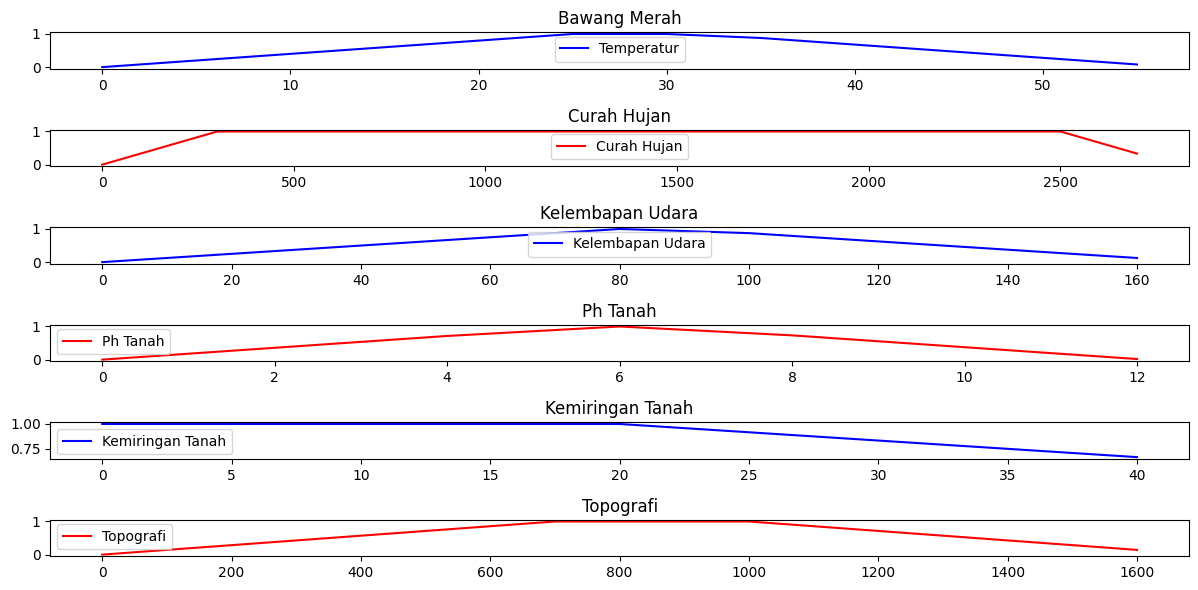

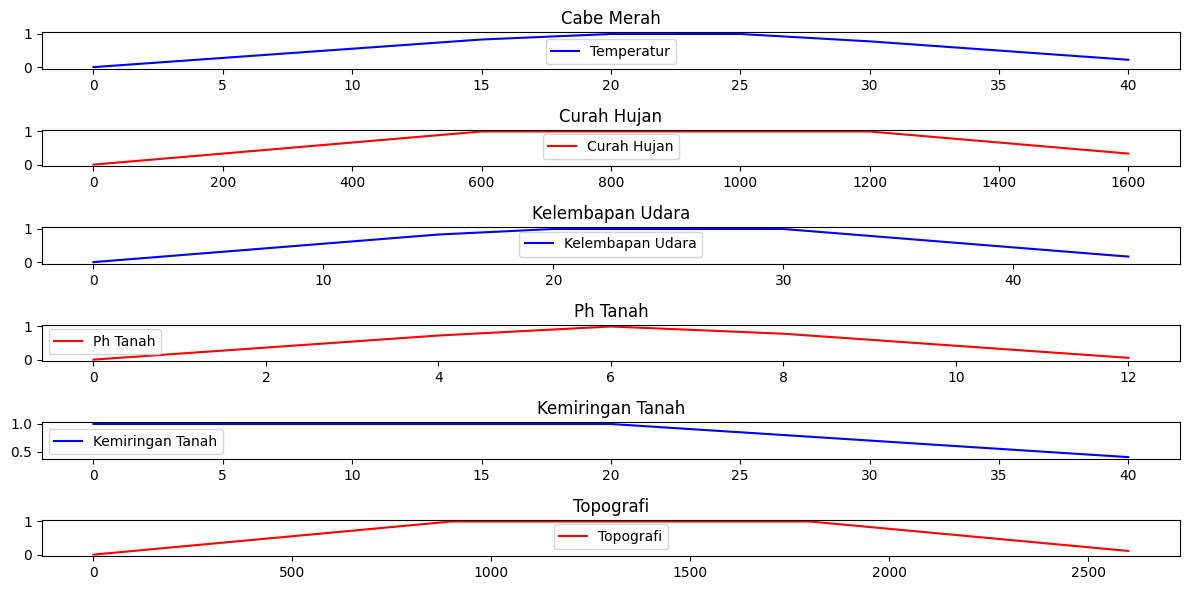

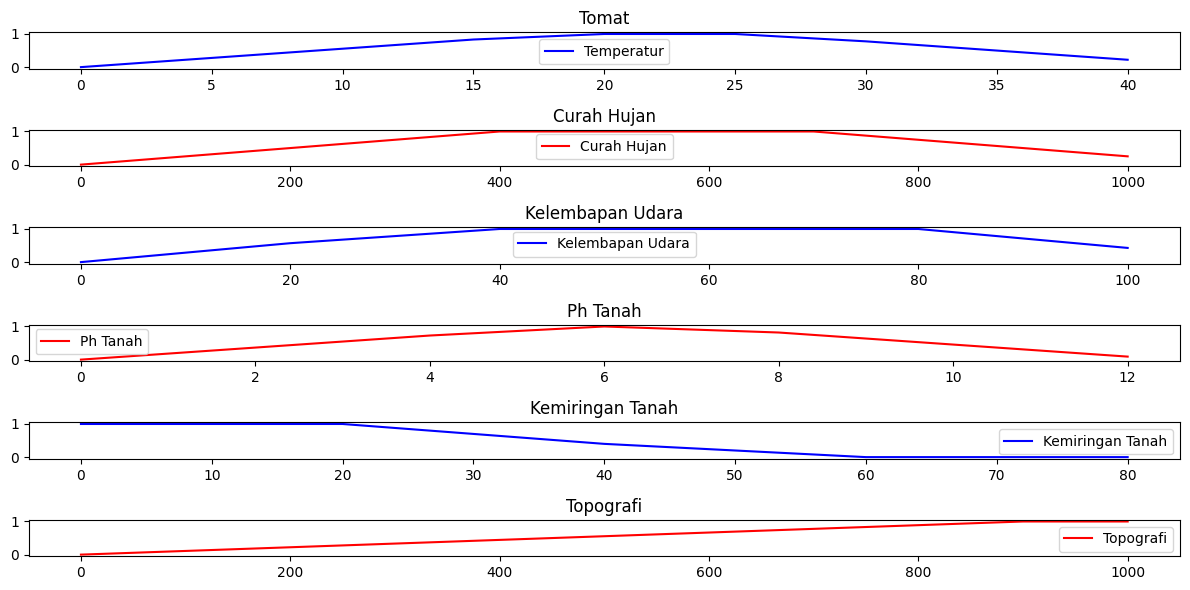

In [ ]:
x_jkbm = np.arange(0, 57, 5) #suhu 14-33: bw 10, batas 40 Bawang Merah
x_chbm = np.arange(0, 2800, 100) #range
x_kubm = np.arange(0, 170, 20) #range
#x_jtbm=np.arange ('alufial')
#x_ttbm=np.arange ('lempung liat')
x_phtbm = np.arange(0, 12.1, 2) #range
x_kmbm = np.arange(0, 60, 20) #range
x_tobm = np.arange(0, 1700, 100) #range

x_jkcm = np.arange(0, 44, 5) #suhu 14-33: bw 10, batas 40 Cabe Merah
x_chcm = np.arange(0, 1700, 100) #range
x_kucm = np.arange(0, 48, 5) #range
#x_jtbm=np.arange ('alufial')
#x_ttbm=np.arange ('lempung liat')
x_phtcm = np.arange(0, 12.3, 2) #range
x_kmcm = np.arange(0, 50, 20) #range
x_tocm = np.arange(0, 2700, 100) #range

x_jktm = np.arange(0, 44, 5) #suhu 14-33: bw 10, batas 40 Tomat
x_chtm = np.arange(0, 1100, 100) #range
x_kutm = np.arange(0, 115, 20) #range
#x_jtbm=np.arange ('alufial')
#x_ttbm=np.arange ('lempung liat')
x_phtm = np.arange(0, 12.5, 2) #range
x_kmtm = np.arange(0, 90, 20) #range
x_totm = np.arange(0, 1100, 100) #range

# Generate grafik bawang merah
jk_sebentarbm = fuzz.trapmf(x_jkbm, [0,25, 32, 57])
jk_curahhujanbm = fuzz.trapmf(x_chbm, [0,300, 2500, 2800])
jk_kelembapanudarabm = fuzz.trapmf(x_kubm, [0,80, 90, 170])
jk_phtanahbm = fuzz.trapmf(x_phtbm, [0,5.6, 6.5, 12.1])
jk_kmbm = fuzz.trapmf(x_kmbm, [0,0,30,60])
jk_tobm = fuzz.trapmf(x_tobm, [0,700, 1000, 1700])

# Generate grafik cabe merah
jk_sebentarcm = fuzz.trapmf(x_jkcm, [0,18, 26, 44])
jk_curahhujancm = fuzz.trapmf(x_chcm, [0,600, 1200, 1800])
jk_kelembapanudaracm = fuzz.trapmf(x_kucm, [0,18, 30, 48])
jk_phtanahcm = fuzz.trapmf(x_phtcm, [0,5.5, 6.8, 12.3])
jk_kmcm = fuzz.trapmf(x_kmcm, [0,0,25,50])
jk_tocm = fuzz.trapmf(x_tocm, [0,900, 1800, 2700])

# Generate grafik tomat merah
jk_sebentartm = fuzz.trapmf(x_jktm, [0,18, 26, 44])
jk_curahhujantm = fuzz.trapmf(x_chtm, [0,400, 700, 1100])
jk_kelembapanudaratm = fuzz.trapmf(x_kutm, [0,35, 80, 115])
jk_phtanahtm = fuzz.trapmf(x_phtcm, [0,5.5, 7.0, 12.5])
jk_kmtm = fuzz.trapmf(x_kmtm, [0,0,25,50])
jk_totm = fuzz.trapmf(x_totm, [0,900, 1800, 2700])

# Visualize bawang merah
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(12, 6))

ax1.plot(x_jkbm, jk_sebentarbm, 'b', linewidth=1.5, label='Temperatur')
ax1.set_title('Bawang Merah')
ax1.legend()
ax2.plot(x_chbm, jk_curahhujanbm, 'r', linewidth=1.5, label='Curah Hujan')
ax2.set_title('Curah Hujan')
ax2.legend()
ax3.plot(x_kubm, jk_kelembapanudarabm, 'b', linewidth=1.5, label='Kelembapan Udara')
ax3.set_title('Kelembapan Udara')
ax3.legend()
ax4.plot(x_phtbm, jk_phtanahbm, 'r', linewidth=1.5, label='Ph Tanah')
ax4.set_title('Ph Tanah')
ax4.legend()
ax5.plot(x_kmbm, jk_kmbm, 'b', linewidth=1.5, label='Kemiringan Tanah')
ax5.set_title('Kemiringan Tanah')
ax5.legend()
ax6.plot(x_tobm, jk_tobm, 'r', linewidth=1.5, label='Topografi')
ax6.set_title('Topografi')
ax6.legend()
plt.tight_layout()

# Visualize cabe merah
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(12, 6))

ax1.plot(x_jkcm, jk_sebentarcm, 'b', linewidth=1.5, label='Temperatur')
ax1.set_title('Cabe Merah')
ax1.legend()
ax2.plot(x_chcm, jk_curahhujancm, 'r', linewidth=1.5, label='Curah Hujan')
ax2.set_title('Curah Hujan')
ax2.legend()
ax3.plot(x_kucm, jk_kelembapanudaracm, 'b', linewidth=1.5, label='Kelembapan Udara')
ax3.set_title('Kelembapan Udara')
ax3.legend()
ax4.plot(x_phtcm, jk_phtanahcm, 'r', linewidth=1.5, label='Ph Tanah')
ax4.set_title('Ph Tanah')
ax4.legend()
ax5.plot(x_kmcm, jk_kmcm, 'b', linewidth=1.5, label='Kemiringan Tanah')
ax5.set_title('Kemiringan Tanah')
ax5.legend()
ax6.plot(x_tocm, jk_tocm, 'r', linewidth=1.5, label='Topografi')
ax6.set_title('Topografi')
ax6.legend()
plt.tight_layout()

# Visualize tomat
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(12, 6))

ax1.plot(x_jktm, jk_sebentartm, 'b', linewidth=1.5, label='Temperatur')
ax1.set_title('Tomat')
ax1.legend()
ax2.plot(x_chtm, jk_curahhujantm, 'r', linewidth=1.5, label='Curah Hujan')
ax2.set_title('Curah Hujan')
ax2.legend()
ax3.plot(x_kutm, jk_kelembapanudaratm, 'b', linewidth=1.5, label='Kelembapan Udara')
ax3.set_title('Kelembapan Udara')
ax3.legend()
ax4.plot(x_phtm, jk_phtanahtm, 'r', linewidth=1.5, label='Ph Tanah')
ax4.set_title('Ph Tanah')
ax4.legend()
ax5.plot(x_kmtm, jk_kmtm, 'b', linewidth=1.5, label='Kemiringan Tanah')
ax5.set_title('Kemiringan Tanah')
ax5.legend()
ax6.plot(x_totm, jk_totm, 'r', linewidth=1.5, label='Topografi')
ax6.set_title('Topografi')
ax6.legend()
plt.tight_layout()



In [ ]:
level_jk_seb = fuzz.interp_membership(x_jkbm, jk_sebentarbm, 36)#bawang merah
level_jk_seb

0.84

In [ ]:
print(data.keys())

In [ ]:
data["interpolasi BM: temperatur"] = fuzz.interp_membership(x_jkbm, jk_sebentarbm, data["E"])*5
data["interpolasi BM: curah hujan"] = fuzz.interp_membership(x_chbm, jk_curahhujanbm, data["F"])*5
data["interpolasi BM: kelembapan udara"] = fuzz.interp_membership(x_kubm, jk_kelembapanudarabm, data["G"])*5
data["interpolasi BM: Ph Tanah"] = fuzz.interp_membership(x_phtbm, jk_phtanahbm, data["J"])*5
data["interpolasi BM: Kemiringan Tanah"] = fuzz.interp_membership(x_kmbm, jk_kmbm, data["K"])*5
data["interpolasi BM: Topografi"] = fuzz.interp_membership(x_tobm, jk_tobm, data["L"])*5
data


In [ ]:
#level_jk_seb = fuzz.interp_membership(x_jkcm, jk_sebentarcm, 36)#cabai merah
#level_jk_seb

In [ ]:
#print(data.keys())

In [ ]:
data["interpolasi CM: temperatur"] = fuzz.interp_membership(x_jkcm, jk_sebentarcm, data["E"])*5
data["interpolasi CM: curah hujan"] = fuzz.interp_membership(x_chcm, jk_curahhujancm, data["F"])*5
data["interpolasi CM: kelembapan udara"] = fuzz.interp_membership(x_kucm, jk_kelembapanudaracm, data["G"])*5
data["interpolasi CM: Ph Tanah"] = fuzz.interp_membership(x_phtcm, jk_phtanahcm, data["J"])*5
data["interpolasi CM: Kemiringan Tanah"] = fuzz.interp_membership(x_kmcm, jk_kmcm, data["K"])*5
data["interpolasi CM: Topografi"] = fuzz.interp_membership(x_tocm, jk_tocm, data["L"])*5
data


In [ ]:
data["interpolasi TM: temperatur"] = fuzz.interp_membership(x_jktm, jk_sebentartm, data["E"])*5
data["interpolasi TM: curah hujan"] = fuzz.interp_membership(x_chtm, jk_curahhujantm, data["F"])*5
data["interpolasi TM: kelembapan udara"] = fuzz.interp_membership(x_kutm, jk_kelembapanudaratm, data["G"])*5
data["interpolasi TM: Ph Tanah"] = fuzz.interp_membership(x_phtm, jk_phtanahtm, data["J"])*5
data["interpolasi TM: Kemiringan Tanah"] = fuzz.interp_membership(x_kmtm, jk_kmtm, data["K"])*5
data["interpolasi TM: Topografi"] = fuzz.interp_membership(x_totm, jk_totm, data["L"])*5
data

,A,B,C,D,E,F,G,H,I,J,...,interpolasi CM: kelembapan udara,interpolasi CM: Ph Tanah,interpolasi CM: Kemiringan Tanah,interpolasi CM: Topografi,interpolasi TM: temperatur,interpolasi TM: curah hujan,interpolasi TM: kelembapan udara,interpolasi TM: Ph Tanah,interpolasi TM: Kemiringan Tanah,interpolasi TM: Topografi
0,1,Kota Uneng,255,Subtropik,23.5,1023.5,62.5,1,1,6.75,...,5.000000,4.659091,5.000,0.208333,5.000000,0.0000,5.000000,4.659091,5.000,0.208333
1,2,Nangalimang,203,Subtropik,23.5,1023.5,62.5,1,1,6.75,...,5.000000,4.659091,5.000,0.277778,5.000000,0.0000,5.000000,4.659091,5.000,0.277778
2,3,Wuring,1650,Subtropik,23.5,1023.5,62.5,1,2,5.10,...,5.000000,4.386364,2.675,1.388889,5.000000,0.0000,5.000000,4.386364,2.675,1.388889
3,4,Wolomarang,700,Subtropik,23.5,1023.5,62.5,1,2,5.10,...,5.000000,4.386364,2.675,1.388889,5.000000,0.0000,5.000000,4.386364,2.675,1.388889
4,5,Tilang,1545,Subtropik,28.0,1725.0,80.0,6,3,5.10,...,5.000000,4.386364,3.950,2.777778,4.333333,0.0000,5.000000,4.386364,3.950,2.777778
5,6,Lusitada,770,Subtropik,28.0,1725.0,80.0,6,3,5.10,...,5.000000,4.386364,3.950,2.777778,4.333333,0.0000,5.000000,4.386364,3.950,2.777778
6,7,Bloro,763,Subtropik,28.0,1725.0,80.0,6,3,5.10,...,5.000000,4.386364,3.950,2.777778,4.333333,0.0000,5.000000,4.386364,3.950,2.777778
7,8,Tebuk,628,Subtropik,28.0,1725.0,80.0,6,3,5.10,...,5.000000,4.386364,5.000,2.777778,4.333333,0.0000,5.000000,4.386364,5.000,2.777778
8,9,Nita,196,Subtropik,28.0,1725.0,80.0,6,3,5.10,...,5.000000,4.386364,5.000,2.777778,4.333333,0.0000,5.000000,4.386364,5.000,2.777778
9,10,Takaplager,410,Subtropik,28.0,1725.0,80.0,6,3,5.10,...,5.000000,4.386364,3.950,2.777778,4.333333,0.0000,5.000000,4.386364,3.950,2.777778


In [ ]:
data['hasil'] = (data['interpolasi BM: curah hujan'] + data['interpolasi KU: kelembapan udara'])/2

data['hasil']

In [ ]:
data['hasil2'] = (data['H'] + data['I']+data['interpolasi PT: Ph Tanah'])/3

In [ ]:
data['hasil2']

In [ ]:
data['hasil3'] = (0.7)* (data['hasil'])+(0.3)* (data['interpolasi BM: temperatur'])

In [ ]:
data['hasil3']